In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Chargement du dataset
df = pd.read_csv('tayara_cars_all_pages.csv')

print("Shape du dataset:", df.shape)
print("\n" + "="*80)
df.head(10)

Shape du dataset: (7178, 17)



,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
0,"Suzuki Celerio, première main",31000.0,53000,Bleu,NaN,Manuelle,2019.0,NaN,Suzuki,Celerio,4.0,Compacte,Essence,"Suzuki Celerio à vendre première main, Faible ...",https://www.tayara.tn/item/voitures/tunis/tuni...,tunis,"12:53, 30/11/2025"
1,Toyota Corolla Dynamic – 2021 – 49 900 km – Ex...,73000.0,49900,Noir,Avec kilométrage,Automatique,2021.0,1.2L,Toyota,Corolla verso,6.0,Compacte,Essence,Je vends ma Toyota Corolla Hatchback – finitio...,https://www.tayara.tn/item/voitures/ariana/la-...,Ariana,"13:53, 28/11/2025"
2,BMW Série 3 F30 316i 2014,NaN,170,Blanc,Nouveau,Manuelle,2014.0,1.6L,BMW,Serie 3 GT,7.0,Berline,Essence,Je mets en vente ma BMW F30 316i (2014) Essenc...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:53, 27/11/2025"
3,Bmw F30,52500.0,170,Blanc,Avec kilométrage,Manuelle,2014.0,1.6L,BMW,Serie 3,7.0,Berline,Essence,À VENDRE : BMW F30 316i – 2014 (Sport Line) Es...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:53, 27/11/2025"
4,voiture Peugeot 3008 à vendre,1111.0,2202021,Bleu,Avec kilométrage,Automatique,2021.0,1.2L,Peugeot,3008,7.0,Autres,Essence,"particulier ,je mets une très belle Peugeot 30...",https://www.tayara.tn/item/voitures/nabeul/ham...,Nabeul,"13:53, 27/11/2025"
5,ford titanium sport 1ère main,52000.0,119000,Bleu,Nouveau,Automatique,2021.0,<1.0L,Ford,Super Duty,7.0,Berline,Essence,⛔Possibilité de Vente ou Echange⛔ 📞 Contact🚗 F...,https://www.tayara.tn/item/voitures/ariana/ari...,Ariana,"13:53, 26/11/2025"
6,Kia Koup en parfait état,28000.0,200000,Gris,Avec kilométrage,Manuelle,2010.0,1.6L,Kia,Cerato,7.0,Berline,Essence,NaN,https://www.tayara.tn/item/voitures/ariana/jar...,Ariana,"13:53, 25/11/2025"
7,Porsche Panamera V6 – Série 220 – Année 2010,160000.0,76000,Noir,Avec kilométrage,Automatique,2010.0,3.5L,Porsche,Panamera,20.0,Berline,Essence,📍 Tunis – 78.000 km – Entretien Porsche Détail...,https://www.tayara.tn/item/voitures/tunis/la-m...,Tunis,"13:53, 24/11/2025"
8,hyundai Kona hybride,85000.0,59400,Gris,Avec kilométrage,Manuelle,2022.0,1.6L,Hyundai,Kona,6.0,4 x 4,Hybride essence,Hyundai Kona Hybride – Avril 2022 – 59400 km S...,https://www.tayara.tn/item/voitures/monastir/m...,Monastir,"13:53, 24/11/2025"
9,voiture,37.0,60000,Noir,Avec kilométrage,Manuelle,2019.0,<1.0L,Citroen,C35,4.0,Autres,Essence,voiture Citroën C3 puissance fiscale : 4 CV es...,https://www.tayara.tn/item/voitures/le-kef/taj...,Le Kef,"13:53, 24/11/2025"


In [3]:
# Informations générales sur le dataset
print("Informations sur le dataset:")
print("="*80)
df.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titre                7178 non-null   object 
 1   prix                 5543 non-null   float64
 2   kilometrage          6536 non-null   object 
 3   couleur_du_vehicule  6800 non-null   object 
 4   etat_du_vehicule     6466 non-null   object 
 5   boite                6783 non-null   object 
 6   annee                6533 non-null   float64
 7   cylindree            6227 non-null   object 
 8   marque               6761 non-null   object 
 9   modele               6438 non-null   object 
 10  puissance_fiscale    6154 non-null   float64
 11  type_de_carrosserie  6101 non-null   object 
 12  carburant            6736 non-null   object 
 13  description          5669 non-null   object 
 14  url                  7178 non-null   object 
 15  location 

In [4]:
# Statistiques descriptives avec la fonction describe().T
print("Statistiques descriptives:")
print("="*80)
df.describe(include='all')

Statistiques descriptives:


,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
count,7178,5.543000e+03,6536,6800,6466,6783,6533.000000,6227,6761,6438,6.154000e+03,6101,6736,5669,7178,3096,3096
unique,5449,NaN,1261,18,5,3,NaN,28,60,497,NaN,8,11,5456,7129,36,129
top,Voitures,NaN,200000,Noir,Avec kilométrage,Manuelle,NaN,1.2L,Volkswagen,Clio,NaN,Berline,Essence,Ranger rover 2lL Modèle 2013 200.000 km Diesel...,https://www.tayara.tn/item/voitures/tunis/tuni...,Tunis,"15:05, 05/11/2025"
freq,160,NaN,125,1884,4660,4669,NaN,1392,841,237,NaN,1872,4419,6,2,585,47
mean,NaN,8.223654e+08,NaN,NaN,NaN,NaN,2017.626512,NaN,NaN,NaN,1.805512e+11,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.677914e+10,NaN,NaN,NaN,NaN,246.358343,NaN,NaN,NaN,1.416377e+13,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000e+03,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.250000e+04,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,5.650000e+04,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Séparation des variables numériques et catégoriques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'prix']

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:")
print(numerical_cols)
print(f"\nNombre de variables numériques: {len(numerical_cols)}")
print("\n" + "="*80)
print("\nVariables catégoriques:")
print(categorical_cols)
print(f"\nNombre de variables catégoriques: {len(categorical_cols)}")

Variables numériques:
['annee', 'puissance_fiscale']

Nombre de variables numériques: 2


Variables catégoriques:
['titre', 'kilometrage', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'cylindree', 'marque', 'modele', 'type_de_carrosserie', 'carburant', 'description', 'url', 'location', 'posting_time']

Nombre de variables catégoriques: 14


In [6]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:


                     Valeurs_Manquantes  Pourcentage
location                           4082    56.868208
posting_time                       4082    56.868208
prix                               1635    22.777933
description                        1509    21.022569
type_de_carrosserie                1077    15.004179
puissance_fiscale                  1024    14.265812
cylindree                           951    13.248816
modele                              740    10.309278
etat_du_vehicule                    712     9.919198
annee                               645     8.985790
kilometrage                         642     8.943996
carburant                           442     6.157704
marque                              417     5.809418
boite                               395     5.502926
couleur_du_vehicule                 378     5.266091


In [7]:
import re

def extract_prix_from_text_advanced(text):
    """
    Extrait le prix depuis un texte en utilisant des regex
    Version avancée avec plus de patterns pour détecter les prix
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    
    # Patterns étendus (du plus spécifique au plus général)
    patterns = [
        # Formats avec DT
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*(?:DT|dt|Dt|dinars?)',
        r'(\d+)\s*(?:DT|dt|Dt|dinars?)',
        
        # Avec mot-clé "prix"
        r'prix[:\s]+(\d{1,3}(?:[,\s]\d{3})+)',
        r'prix[:\s]+(\d+)',
        
        # Avec symboles
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*[€$£]',
        r'(\d+)\s*[€$£]',
        
        # Format "à vendre"
        r'(?:à vendre|vente)[:\s]+(\d{1,3}(?:[,\s]\d{3})+)',
        r'(?:à vendre|vente)[:\s]+(\d+)',
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            prix_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                prix = float(prix_str)
                # Vérifier que le prix est raisonnable (entre 1000 et 1000000 DT)
                if 1000 <= prix <= 1000000:
                    return prix
            except:
                continue
    
    return None

print("✓ Fonction extract_prix_from_text_advanced définie avec succès!")

✓ Fonction extract_prix_from_text_advanced définie avec succès!


In [8]:
# Vérification et correction des prix par comparaison avec titre et description
def verify_and_correct_prix(row):
    """
    Vérifie si le prix dans la colonne correspond au prix dans le texte.
    Si différence, prend la valeur la plus grande.
    """
    prix_actuel = row['prix']
    
    # Extraire le prix depuis le titre et la description
    prix_from_titre = extract_prix_from_text_advanced(row.get('titre', ''))
    prix_from_description = extract_prix_from_text_advanced(row.get('description', ''))
    
    # Collecter tous les prix trouvés (non None)
    prix_list = [p for p in [prix_actuel, prix_from_titre, prix_from_description] if pd.notna(p)]
    
    if len(prix_list) == 0:
        # Retourner un dictionnaire même si aucun prix n'est trouvé
        return {
            'prix_original': prix_actuel,
            'prix_titre': prix_from_titre,
            'prix_description': prix_from_description,
            'prix_final': prix_actuel,
            'changed': False
        }
    
    # Prendre le prix maximum
    prix_max = max(prix_list)
    
    # Retourner les informations pour logging
    return {
        'prix_original': prix_actuel,
        'prix_titre': prix_from_titre,
        'prix_description': prix_from_description,
        'prix_final': prix_max,
        'changed': prix_max != prix_actuel if pd.notna(prix_actuel) else False
    }

# Appliquer la vérification sur toutes les lignes

results = []
for idx in df.index:
    result = verify_and_correct_prix(df.loc[idx])
    results.append(result)
    
    # Mettre à jour le prix si changement
    if result['changed']:
        df.loc[idx, 'prix'] = result['prix_final']

# Analyser les résultats
corrections = [r for r in results if r['changed']]
total_corrections = len(corrections)

print(f"\n{'='*80}")
print("RÉSUMÉ DE LA VÉRIFICATION")
print(f"{'='*80}")
print(f"Total lignes vérifiées: {len(results)}")
print(f"Prix corrigés: {total_corrections}")
print(f"Taux de correction: {(total_corrections/len(results)*100):.2f}%")


RÉSUMÉ DE LA VÉRIFICATION
Total lignes vérifiées: 7178
Prix corrigés: 73
Taux de correction: 1.02%


In [9]:
# Application de l'extraction de prix depuis les colonnes texte

# Identifier les lignes avec prix manquant
missing_prix_mask = df['prix'].isnull()
missing_count_initial = missing_prix_mask.sum()

print(f"Nombre de prix manquants: {missing_count_initial}")

if missing_count_initial > 0:
    # Colonnes de texte où chercher le prix
    text_columns = ['description', 'titre']
    
    extracted_count = 0
    extracted_details = []
    
    for idx in df[missing_prix_mask].index:
        prix_found = None
        source_col = None
        
        # Chercher dans chaque colonne de texte
        for col in text_columns:
            if col in df.columns:
                prix_found = extract_prix_from_text_advanced(df.loc[idx, col])
                if prix_found is not None:
                    df.loc[idx, 'prix'] = prix_found
                    extracted_count += 1
                    source_col = col
                    extracted_details.append({
                        'index': idx,
                        'prix': prix_found,
                        'source': col,
                        'texte': df.loc[idx, col][:100] + '...'
                    })
                    break
    
    print(f"\n{'='*80}")
    print(f"Résumé de l'extraction:")
    print(f"  Prix extraits avec succès: {extracted_count}")
    print(f"  Prix toujours manquants: {df['prix'].isnull().sum()}")
    print(f"  Taux de récupération: {(extracted_count/missing_count_initial)*100:.2f}%")
else:
    print("✓ Aucun prix manquant à traiter!")

print(f"\n{'='*80}")
print(f"État final:")
print(f"  Total lignes: {len(df)}")
print(f"  Prix disponibles: {df['prix'].notna().sum()}")
print(f"  Prix manquants: {df['prix'].isnull().sum()}")

Nombre de prix manquants: 1635

Résumé de l'extraction:
  Prix extraits avec succès: 20
  Prix toujours manquants: 1615
  Taux de récupération: 1.22%

État final:
  Total lignes: 7178
  Prix disponibles: 5563
  Prix manquants: 1615


In [10]:
# Extraction complète du DataFrame en JSON
print("Extraction complète du DataFrame en JSON...")
print("="*80)

# Exporter le DataFrame complet en JSON
df.to_json('dataset_complet.json', orient='records', indent=2, force_ascii=False)

print(f"✓ Fichier 'dataset_complet.json' créé avec succès!")
print(f"✓ Nombre total d'enregistrements: {len(df)}")
print(f"✓ Nombre de colonnes: {len(df.columns)}")

# Statistiques du fichier
import os
file_size = os.path.getsize('dataset_complet.json')
file_size_mb = file_size / (1024 * 1024)

# Afficher un aperçu (premier enregistrement)
print(f"\n{'-'*80}")
print("Aperçu du premier enregistrement (JSON):")
print("-"*80)
import json
first_record = df.iloc[0].to_dict()
# Convertir les valeurs numpy en types Python natifs
for key, value in first_record.items():
    if pd.isna(value):
        first_record[key] = None
    elif isinstance(value, (np.integer, np.floating)):
        first_record[key] = value.item()

print(json.dumps(first_record, ensure_ascii=False, indent=2))


Extraction complète du DataFrame en JSON...
✓ Fichier 'dataset_complet.json' créé avec succès!
✓ Nombre total d'enregistrements: 7178
✓ Nombre de colonnes: 17

--------------------------------------------------------------------------------
Aperçu du premier enregistrement (JSON):
--------------------------------------------------------------------------------
{
  "titre": "Suzuki Celerio, première main",
  "prix": 31000.0,
  "kilometrage": "53000",
  "couleur_du_vehicule": "Bleu",
  "etat_du_vehicule": null,
  "boite": "Manuelle",
  "annee": 2019.0,
  "cylindree": null,
  "marque": "Suzuki",
  "modele": "Celerio",
  "puissance_fiscale": 4.0,
  "type_de_carrosserie": "Compacte",
  "carburant": "Essence",
  "description": "Suzuki Celerio à vendre première main, Faible kilométrage (53600km), Entretien maison Suzuki,Lire plus",
  "url": "https://www.tayara.tn/item/voitures/tunis/tunis/suzuki-celerio-premire-main/6929c177145e1617cbad8935/",
  "location": "tunis",
  "posting_time": "12:53, 

In [11]:
# Suppression des lignes où le prix est toujours manquant
df.dropna(subset=["prix"], inplace=True)
print(df["prix"].isnull().sum())

0


In [12]:
# Création du dictionnaire marque-modèle à partir des données existantes
print("Création du dictionnaire marque-modèle...")
print("="*80)

# Créer un dictionnaire {marque: [liste de modèles]}
marque_modele_dict = {}

# Parcourir les lignes où marque et modele sont tous deux non nuls
data_with_both = df[(df['marque'].notna()) & (df['modele'].notna())]

for idx, row in data_with_both.iterrows():
    marque = str(row['marque']).strip().lower()
    modele = str(row['modele']).strip().lower()
    
    if marque not in marque_modele_dict:
        marque_modele_dict[marque] = set()
    marque_modele_dict[marque].add(modele)

# Convertir les sets en listes pour faciliter l'affichage
marque_modele_dict = {marque: list(modeles) for marque, modeles in marque_modele_dict.items()}

print(f"✓ Dictionnaire créé avec {len(marque_modele_dict)} marques")
print(f"✓ Nombre total de combinaisons marque-modèle: {sum(len(modeles) for modeles in marque_modele_dict.values())}")

# Afficher quelques exemples
print(f"\n{'-'*80}")
print("Exemples de marques et leurs modèles (premiers 5):")
for i, (marque, modeles) in enumerate(list(marque_modele_dict.items())[:5]):
    print(f"\n{marque.upper()}:")
    print(f"  Modèles: {', '.join(modeles[:10])}")
    if len(modeles) > 10:
        print(f"  ... et {len(modeles) - 10} autres modèles")

print(f"\n{'='*80}")

Création du dictionnaire marque-modèle...
✓ Dictionnaire créé avec 57 marques
✓ Nombre total de combinaisons marque-modèle: 473

--------------------------------------------------------------------------------
Exemples de marques et leurs modèles (premiers 5):

SUZUKI:
  Modèles: wagon r, maruti, samurai, sx4, xl7, baleno, vitara, swift, alto, celerio

TOYOTA:
  Modèles: starlet, yaris verso, avensis, rav 4, hilux, prado, land cruiser, hi ace, previa, runner
  ... et 7 autres modèles

BMW:
  Modèles: x4, serie 2, serie 7, serie 8, m, m6, serie 5, afficher le numéro, x3, x1
  ... et 11 autres modèles

PEUGEOT:
  Modèles: 207, 205, 206+, rcz, peugeot.206, 206, 107, 505, tepee, 301
  ... et 26 autres modèles

FORD:
  Modèles: fusion, ranger, escort, ka, c-max, transit, mondeo, kuga, maverick, super duty
  ... et 8 autres modèles



In [13]:
def extract_marque(text, marque_dict):
    """
    Extrait la marque du véhicule en cherchant dans le texte
    et en comparant avec le dictionnaire des marques connues
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Chercher chaque marque connue dans le texte
    for marque in marque_dict.keys():
        if marque in text:
            return marque
    
    return None


def extract_modele(text, marque, marque_modele_dict):
    """
    Extrait le modèle du véhicule en fonction de la marque
    et du dictionnaire marque-modèle
    """
    if pd.isna(text) or text == '' or pd.isna(marque) or marque == '':
        return None
    
    text = str(text).lower()
    marque_lower = str(marque).strip().lower()
    
    # Si la marque n'existe pas dans le dictionnaire, impossible d'extraire
    if marque_lower not in marque_modele_dict:
        return None
    
    # Chercher chaque modèle de cette marque dans le texte
    modeles = marque_modele_dict[marque_lower]
    
    # Trier les modèles par longueur décroissante pour matcher d'abord les plus spécifiques
    modeles_sorted = sorted(modeles, key=len, reverse=True)
    
    for modele in modeles_sorted:
        if modele in text:
            return modele
    
    return None

print("✓ Fonctions d'extraction marque et modèle créées avec succès!")
print("  - extract_marque()")
print("  - extract_modele()")

✓ Fonctions d'extraction marque et modèle créées avec succès!
  - extract_marque()
  - extract_modele()


In [14]:
# Application de l'extraction marque et modèle
print("Extraction des marques et modèles depuis les champs texte...")
print("="*80)

# Colonnes de texte où chercher les informations
text_columns = ['description', 'titre']

# === EXTRACTION DE LA MARQUE ===
print(f"\n{'-'*80}")
print("Traitement de: marque")
print(f"{'-'*80}")

missing_marque_mask = df['marque'].isnull()
missing_marque_initial = missing_marque_mask.sum()

print(f"  Valeurs manquantes: {missing_marque_initial}")

if missing_marque_initial > 0:
    extracted_marque_count = 0
    
    for idx in df[missing_marque_mask].index:
        marque_found = None
        
        # Chercher dans chaque colonne de texte
        for col in text_columns:
            if col in df.columns:
                marque_found = extract_marque(df.loc[idx, col], marque_modele_dict)
                if marque_found is not None:
                    df.loc[idx, 'marque'] = marque_found
                    extracted_marque_count += 1
                    break
    
    missing_marque_after = df['marque'].isnull().sum()
    recovery_rate_marque = (extracted_marque_count / missing_marque_initial) * 100 if missing_marque_initial > 0 else 0
    
    print(f"  ✓ Extraits: {extracted_marque_count}")
    print(f"  ✓ Restants: {missing_marque_after}")
    print(f"  ✓ Taux de récupération: {recovery_rate_marque:.2f}%")
else:
    print(f"  ✓ Aucune valeur manquante!")

# === EXTRACTION DU MODÈLE ===
print(f"\n{'-'*80}")
print("Traitement de: modele")
print(f"{'-'*80}")

missing_modele_mask = df['modele'].isnull()
missing_modele_initial = missing_modele_mask.sum()

print(f"  Valeurs manquantes: {missing_modele_initial}")

if missing_modele_initial > 0:
    extracted_modele_count = 0
    
    for idx in df[missing_modele_mask].index:
        modele_found = None
        
        # Obtenir la marque de cette ligne (peut être déjà présente ou fraîchement extraite)
        marque_row = df.loc[idx, 'marque']
        
        if pd.notna(marque_row):
            # Chercher dans chaque colonne de texte
            for col in text_columns:
                if col in df.columns:
                    modele_found = extract_modele(df.loc[idx, col], marque_row, marque_modele_dict)
                    if modele_found is not None:
                        df.loc[idx, 'modele'] = modele_found
                        extracted_modele_count += 1
                        break
    
    missing_modele_after = df['modele'].isnull().sum()
    recovery_rate_modele = (extracted_modele_count / missing_modele_initial) * 100 if missing_modele_initial > 0 else 0
    
    print(f"  ✓ Extraits: {extracted_modele_count}")
    print(f"  ✓ Restants: {missing_modele_after}")
    print(f"  ✓ Taux de récupération: {recovery_rate_modele:.2f}%")
else:
    print(f"  ✓ Aucune valeur manquante!")

# Résumé final
print(f"\n{'='*80}")
print("RÉSUMÉ DE L'EXTRACTION MARQUE-MODÈLE")
print(f"{'='*80}")
print(f"Marques extraites: {extracted_marque_count if missing_marque_initial > 0 else 0}")
print(f"Modèles extraits: {extracted_modele_count if missing_modele_initial > 0 else 0}")
print(f"Total: {(extracted_marque_count if missing_marque_initial > 0 else 0) + (extracted_modele_count if missing_modele_initial > 0 else 0)}")
print(f"{'='*80}")

Extraction des marques et modèles depuis les champs texte...

--------------------------------------------------------------------------------
Traitement de: marque
--------------------------------------------------------------------------------
  Valeurs manquantes: 277
  ✓ Extraits: 149
  ✓ Restants: 128
  ✓ Taux de récupération: 53.79%

--------------------------------------------------------------------------------
Traitement de: modele
--------------------------------------------------------------------------------
  Valeurs manquantes: 537
  ✓ Extraits: 177
  ✓ Restants: 360
  ✓ Taux de récupération: 32.96%

RÉSUMÉ DE L'EXTRACTION MARQUE-MODÈLE
Marques extraites: 149
Modèles extraits: 177
Total: 326


In [15]:
def extract_cylindree(text):
    """Extrait la cylindrée (ex: 1.6L, 1600cc, 1600 cm3)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d+\.?\d*)\s*(?:L|l|litres?)',  # 1.6L, 1.6 litres
        r'(\d{3,4})\s*(?:cc|cm3|cm³)',     # 1600cc, 1600 cm3
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            val_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                val = float(val_str)
                # Convertir cc en L si nécessaire
                if val > 50:  # Si > 50, c'est probablement en cc
                    val = val / 1000
                if 0.5 <= val <= 8.0:  # Vérifier plage raisonnable
                    return f"{val}L"
            except:
                continue
    return None


def extract_puissance_fiscale(text):
    """Extrait la puissance fiscale (ex: 7 CV, 7cv)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d+)\s*(?:CV|cv|Cv|chevaux)',
        r'puissance[:\s]+(\d+)',
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            try:
                val = int(match.group(1))
                if 1 <= val <= 30:  # Plage raisonnable pour puissance fiscale
                    return val
            except:
                continue
    return None


def extract_annee(text):
    """Extrait l'année (ex: 2019, année 2019)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(?:année|modèle|model)[\s:]+(\d{4})',
        r'\b(20\d{2})\b',  # Années 2000-2099
        r'\b(19\d{2})\b',  # Années 1900-1999
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            try:
                val = int(match.group(1))
                if 1990 <= val <= 2026:  # Plage raisonnable
                    return val
            except:
                continue
    return None


def extract_kilometrage(text):
    """Extrait le kilométrage (ex: 50 000 km, 50000km, 50k km)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*(?:km|KM|kilomètre)',  # 50 000 km
        r'(\d+)\s*(?:km|KM|kilomètre)',                     # 50000 km
        r'(\d+)[kK]\s*(?:km|KM)',                           # 50k km
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            val_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                val = float(val_str)
                # Si notation 'k', multiplier par 1000
                if 'k' in match.group(0).lower() or 'K' in match.group(0):
                    val = val * 1000
                if 0 <= val <= 1000000:  # Plage raisonnable
                    return int(val)
            except:
                continue
    return None


def extract_carburant(text):
    """Extrait le type de carburant"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    carburants = {
        'essence': ['essence', 'gasoline', 'petrol'],
        'diesel': ['diesel', 'gasoil', 'gazole'],
        'électrique': ['électrique', 'electrique', 'electric', 'ev'],
        'hybride': ['hybride', 'hybrid'],
        'GPL': ['gpl', 'gaz'],
    }
    
    for carburant, keywords in carburants.items():
        for keyword in keywords:
            if keyword in text:
                return carburant
    return None


def extract_boite(text):
    """Extrait le type de boîte de vitesses"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    boites = {
        'Manuelle': ['manuelle', 'manual', 'manuel', 'bvm'],
        'Automatique': ['automatique', 'automatic', 'auto', 'bva', 'cvt'],
        'Semi-automatique': ['semi-automatique', 'semi automatique', 'semi'],
    }
    
    for boite, keywords in boites.items():
        for keyword in keywords:
            if keyword in text:
                return boite
    return None


def extract_couleur(text):
    """Extrait la couleur du véhicule"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    couleurs = {
        'Blanc': ['blanc', 'white', 'blanche'],
        'Noir': ['noir', 'black', 'noire'],
        'Gris': ['gris', 'gray', 'grey', 'grise'],
        'Rouge': ['rouge', 'red'],
        'Bleu': ['bleu', 'blue', 'bleue'],
        'Vert': ['vert', 'green', 'verte'],
        'Jaune': ['jaune', 'yellow'],
        'Orange': ['orange'],
        'Marron': ['marron', 'brown', 'beige'],
        'Argent': ['argent', 'silver', 'argenté'],
        'Or': ['or', 'gold', 'doré'],
    }
    
    for couleur, keywords in couleurs.items():
        for keyword in keywords:
            if keyword in text:
                return couleur
    return None


def extract_etat_vehicule(text):
    """
    Extrait l'état du véhicule et le mappe vers les catégories standardisées:
    - Nouveau
    - Avec kilométrage
    - Non dédouanné
    - RS
    - Pièces manquantes
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Mapping des patterns vers les catégories (ordre important!)
    etats = {
        'Pièces manquantes': ['pièces manquantes', 'pieces manquantes', 'manque pièces', 'manque pieces'],
        'Non dédouanné': ['non dédouanné', 'non dedouanne', 'non douane', 'non dédouané', 'pas dédouanné'],
        'RS': [' rs ', 'rs ', ' rs', 'roulage simple'],
        'Nouveau': ['état neuf', 'etat neuf', 'neuf', 'new', 'état d\'origine', 'etat d\'origine', 'comme neuf'],
        'Avec kilométrage': ['première main', 'premiere main', '1ère main', '1ere main', '1er main', 'premier main',
                             'occasion', 'deuxième main', 'deuxieme main', '2ème main', '2eme main',
                             'utilisé', 'utilise', 'used', 'avec kilométrage', 'avec kilometrage'],
    }
    
    for etat, keywords in etats.items():
        for keyword in keywords:
            if keyword in text:
                return etat
    
    return None


def extract_type_carrosserie(text):
    """
    Extrait le type de carrosserie et le mappe vers les catégories standardisées:
    - Compact
    - Berline
    - Cabriolet
    - 4 x 4
    - Monospace
    - Utilitaire
    - Pick up
    - Autres
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Mapping des patterns vers les catégories (ordre important!)
    types_carrosserie = {
        'Pick up': ['pick up', 'pickup', 'pick-up'],
        'Cabriolet': ['cabriolet', 'convertible', 'décapotable', 'decapotable', 'cabrio'],
        'Monospace': ['monospace', 'minivan', 'van', 'mpv'],
        'Utilitaire': ['utilitaire', 'fourgon', 'camionnette', 'utility'],
        '4 x 4': ['4x4', '4 x 4', 'suv', 'tout terrain', 'tout-terrain', 'crossover', 'jeep'],
        'Berline': ['berline', 'sedan', 'saloon'],
        'Compact': ['compacte', 'compact', 'citadine', 'hatchback', 'petite'],
        'Autres': ['coupé', 'coupe', 'break', 'wagon', 'roadster', 'sportive', 'limousine'],
    }
    
    for type_carrosserie, keywords in types_carrosserie.items():
        for keyword in keywords:
            if keyword in text:
                return type_carrosserie
    
    return None

print("✓ Toutes les fonctions d'extraction créées avec succès!")
print("  - extract_cylindree()")
print("  - extract_puissance_fiscale()")
print("  - extract_annee()")
print("  - extract_kilometrage()")
print("  - extract_carburant()")
print("  - extract_boite()")
print("  - extract_couleur()")
print("  - extract_etat_vehicule()")
print("  - extract_type_carrosserie()")

✓ Toutes les fonctions d'extraction créées avec succès!
  - extract_cylindree()
  - extract_puissance_fiscale()
  - extract_annee()
  - extract_kilometrage()
  - extract_carburant()
  - extract_boite()
  - extract_couleur()
  - extract_etat_vehicule()
  - extract_type_carrosserie()


In [16]:
# Application des fonctions d'extraction sur les colonnes avec valeurs manquantes
print("Application des extractions sur les features...")
print("="*80)

# Définir les colonnes à traiter et leurs fonctions d'extraction
extraction_config = {
    'cylindree': extract_cylindree,
    'puissance_fiscale': extract_puissance_fiscale,
    'annee': extract_annee,
    'kilometrage': extract_kilometrage,
    'carburant': extract_carburant,
    'boite': extract_boite,
    'couleur_du_vehicule': extract_couleur,
    'etat_du_vehicule': extract_etat_vehicule,
    'type_de_carrosserie': extract_type_carrosserie,
}

# Colonnes de texte où chercher les informations
text_columns = ['description', 'titre']

# Résultats globaux
total_extractions = 0
results_summary = {}

# Traiter chaque feature
for feature, extract_func in extraction_config.items():
    print(f"\n{'-'*80}")
    print(f"Traitement de: {feature}")
    print(f"{'-'*80}")
    
    # Identifier les lignes avec valeur manquante
    missing_mask = df[feature].isnull()
    missing_count_initial = missing_mask.sum()
    
    print(f"  Valeurs manquantes: {missing_count_initial}")
    
    if missing_count_initial > 0:
        extracted_count = 0
        
        for idx in df[missing_mask].index:
            value_found = None
            
            # Chercher dans chaque colonne de texte
            for col in text_columns:
                if col in df.columns:
                    value_found = extract_func(df.loc[idx, col])
                    if value_found is not None:
                        df.loc[idx, feature] = value_found
                        extracted_count += 1
                        total_extractions += 1
                        break
        
        missing_after = df[feature].isnull().sum()
        recovery_rate = (extracted_count / missing_count_initial) * 100 if missing_count_initial > 0 else 0
        
        results_summary[feature] = {
            'initial': missing_count_initial,
            'extracted': extracted_count,
            'remaining': missing_after,
            'rate': recovery_rate
        }
        
        print(f"  ✓ Extraits: {extracted_count}")
        print(f"  ✓ Restants: {missing_after}")
        print(f"  ✓ Taux de récupération: {recovery_rate:.2f}%")
    else:
        print(f"  ✓ Aucune valeur manquante!")
        results_summary[feature] = {
            'initial': 0,
            'extracted': 0,
            'remaining': 0,
            'rate': 0
        }

# Résumé final
print(f"\n{'='*80}")
print("RÉSUMÉ GLOBAL DES EXTRACTIONS")
print(f"{'='*80}")
print(f"Total d'extractions réussies: {total_extractions}")
print(f"\nDétail par feature:")
print(f"{'-'*80}")
print(f"{'Feature':<25} {'Initial':<10} {'Extraits':<10} {'Restants':<10} {'Taux %':<10}")
print(f"{'-'*80}")

for feature, stats in results_summary.items():
    print(f"{feature:<25} {stats['initial']:<10} {stats['extracted']:<10} {stats['remaining']:<10} {stats['rate']:<10.2f}")

print(f"{'='*80}")

Application des extractions sur les features...

--------------------------------------------------------------------------------
Traitement de: cylindree
--------------------------------------------------------------------------------
  Valeurs manquantes: 684
  ✓ Extraits: 38
  ✓ Restants: 646
  ✓ Taux de récupération: 5.56%

--------------------------------------------------------------------------------
Traitement de: puissance_fiscale
--------------------------------------------------------------------------------
  Valeurs manquantes: 729
  ✓ Extraits: 77
  ✓ Restants: 652
  ✓ Taux de récupération: 10.56%

--------------------------------------------------------------------------------
Traitement de: annee
--------------------------------------------------------------------------------
  Valeurs manquantes: 439
  ✓ Extraits: 79
  ✓ Restants: 360
  ✓ Taux de récupération: 18.00%

--------------------------------------------------------------------------------
Traitement de: kilome

In [17]:
print(df["boite"].isnull().sum())

250


In [18]:
# Création des dictionnaires de corrélation cylindrée <-> puissance fiscale
print("Création des dictionnaires de corrélation cylindrée <-> puissance fiscale...")
print("="*80)

# Filtrer les données où les deux valeurs sont présentes
data_with_both_power_cylinder = df[(df['cylindree'].notna()) & (df['puissance_fiscale'].notna())]

print(f"Nombre de lignes avec cylindrée ET puissance fiscale: {len(data_with_both_power_cylinder)}")

# Dictionnaire: puissance_fiscale -> liste de cylindrées
pf_to_cylindree = {}
# Dictionnaire: cylindree -> liste de puissances fiscales
cylindree_to_pf = {}

for idx, row in data_with_both_power_cylinder.iterrows():
    pf = row['puissance_fiscale']
    cylindree = str(row['cylindree']).strip()
    
    # Remplir puissance_fiscale -> cylindree
    if pf not in pf_to_cylindree:
        pf_to_cylindree[pf] = []
    pf_to_cylindree[pf].append(cylindree)
    
    # Remplir cylindree -> puissance_fiscale
    if cylindree not in cylindree_to_pf:
        cylindree_to_pf[cylindree] = []
    cylindree_to_pf[cylindree].append(pf)

# Calculer la valeur la plus fréquente (mode) pour chaque clé
pf_to_cylindree_mode = {}
for pf, cylindrees in pf_to_cylindree.items():
    # Trouver la cylindrée la plus fréquente pour cette puissance fiscale
    mode_result = pd.Series(cylindrees).mode()
    if len(mode_result) > 0:
        pf_to_cylindree_mode[pf] = mode_result[0]

cylindree_to_pf_mode = {}
for cylindree, pfs in cylindree_to_pf.items():
    # Trouver la puissance fiscale la plus fréquente pour cette cylindrée
    mode_result = pd.Series(pfs).mode()
    if len(mode_result) > 0:
        cylindree_to_pf_mode[cylindree] = mode_result[0]

print(f"\n✓ Dictionnaires créés avec succès!")
print(f"  - {len(pf_to_cylindree_mode)} puissances fiscales uniques")
print(f"  - {len(cylindree_to_pf_mode)} cylindrées uniques")

Création des dictionnaires de corrélation cylindrée <-> puissance fiscale...
Nombre de lignes avec cylindrée ET puissance fiscale: 4652

✓ Dictionnaires créés avec succès!
  - 136 puissances fiscales uniques
  - 36 cylindrées uniques


In [19]:
# Application de l'imputation cylindrée <-> puissance fiscale
print("Imputation cylindrée <-> puissance fiscale...")
print("="*80)

# === IMPUTATION CYLINDRÉE À PARTIR DE PUISSANCE FISCALE ===
print(f"\n{'-'*80}")
print("Imputation de la cylindrée à partir de la puissance fiscale")
print(f"{'-'*80}")

missing_cylindree = df['cylindree'].isnull()
has_pf = df['puissance_fiscale'].notna()
can_impute_cylindree = missing_cylindree & has_pf

print(f"  Cylindrée manquante: {missing_cylindree.sum()}")
print(f"  Lignes avec PF disponible: {can_impute_cylindree.sum()}")

imputed_cylindree_count = 0

for idx in df[can_impute_cylindree].index:
    pf = df.loc[idx, 'puissance_fiscale']
    
    if pf in pf_to_cylindree_mode:
        df.loc[idx, 'cylindree'] = pf_to_cylindree_mode[pf]
        imputed_cylindree_count += 1

print(f"  ✓ Cylindrées imputées: {imputed_cylindree_count}")
print(f"  ✓ Cylindrées restantes manquantes: {df['cylindree'].isnull().sum()}")

# === IMPUTATION PUISSANCE FISCALE À PARTIR DE CYLINDRÉE ===
print(f"\n{'-'*80}")
print("Imputation de la puissance fiscale à partir de la cylindrée")
print(f"{'-'*80}")

missing_pf = df['puissance_fiscale'].isnull()
has_cylindree = df['cylindree'].notna()
can_impute_pf = missing_pf & has_cylindree

print(f"  Puissance fiscale manquante: {missing_pf.sum()}")
print(f"  Lignes avec cylindrée disponible: {can_impute_pf.sum()}")

imputed_pf_count = 0

for idx in df[can_impute_pf].index:
    cylindree = str(df.loc[idx, 'cylindree']).strip()
    
    if cylindree in cylindree_to_pf_mode:
        df.loc[idx, 'puissance_fiscale'] = cylindree_to_pf_mode[cylindree]
        imputed_pf_count += 1

print(f"  ✓ Puissances fiscales imputées: {imputed_pf_count}")
print(f"  ✓ Puissances fiscales restantes manquantes: {df['puissance_fiscale'].isnull().sum()}")

Imputation cylindrée <-> puissance fiscale...

--------------------------------------------------------------------------------
Imputation de la cylindrée à partir de la puissance fiscale
--------------------------------------------------------------------------------
  Cylindrée manquante: 646
  Lignes avec PF disponible: 259
  ✓ Cylindrées imputées: 257
  ✓ Cylindrées restantes manquantes: 389

--------------------------------------------------------------------------------
Imputation de la puissance fiscale à partir de la cylindrée
--------------------------------------------------------------------------------
  Puissance fiscale manquante: 652
  Lignes avec cylindrée disponible: 265
  ✓ Puissances fiscales imputées: 258
  ✓ Puissances fiscales restantes manquantes: 394


In [20]:
# Exporter le DataFrame en format JSON
df.to_json('nouveau_dataset.json', orient='records', lines=True, force_ascii=False)

print("✓ Le fichier 'nouveau_dataset.json' a été téléchargé avec succès.")

✓ Le fichier 'nouveau_dataset.json' a été téléchargé avec succès.


In [21]:
# Création du dictionnaire marque-modèle-boite avec comptage
print("Création du dictionnaire marque-modèle-boite...")
print("="*80)

# Dictionnaire imbriqué: {marque: {modele: {type_boite: count}}}
marque_modele_boite_dict = {}

# Parcourir les lignes où marque, modele ET boite sont tous non nuls
data_with_all_three = df[(df['marque'].notna()) & (df['modele'].notna()) & (df['boite'].notna())]

print(f"Nombre de lignes avec marque, modèle ET boite: {len(data_with_all_three)}")

for idx, row in data_with_all_three.iterrows():
    marque = str(row['marque']).strip().lower()
    modele = str(row['modele']).strip().lower()
    boite = str(row['boite']).strip()
    
    # Initialiser la structure si nécessaire
    if marque not in marque_modele_boite_dict:
        marque_modele_boite_dict[marque] = {}
    
    if modele not in marque_modele_boite_dict[marque]:
        marque_modele_boite_dict[marque][modele] = {}
    
    if boite not in marque_modele_boite_dict[marque][modele]:
        marque_modele_boite_dict[marque][modele][boite] = 0
    
    # Incrémenter le compteur
    marque_modele_boite_dict[marque][modele][boite] += 1

# Statistiques
total_marques = len(marque_modele_boite_dict)
total_modeles = sum(len(modeles) for modeles in marque_modele_boite_dict.values())

print(f"\n✓ Dictionnaire créé avec succès!")
print(f"  - {total_marques} marques")
print(f"  - {total_modeles} combinaisons marque-modèle")

Création du dictionnaire marque-modèle-boite...
Nombre de lignes avec marque, modèle ET boite: 5103

✓ Dictionnaire créé avec succès!
  - 57 marques
  - 471 combinaisons marque-modèle


In [22]:
# Application de l'imputation de boite basée sur marque-modèle
print("Imputation du type de boite basée sur marque-modèle...")
print("="*80)

# Identifier les lignes avec boite manquante mais marque et modèle présents
missing_boite = df['boite'].isnull()
has_marque = df['marque'].notna()
has_modele = df['modele'].notna()
can_impute_boite = missing_boite & has_marque & has_modele

print(f"Boite manquante: {missing_boite.sum()}")
print(f"Lignes avec marque ET modèle disponibles: {can_impute_boite.sum()}")

imputed_boite_count = 0
not_found_in_dict = 0

for idx in df[can_impute_boite].index:
    marque = str(df.loc[idx, 'marque']).strip().lower()
    modele = str(df.loc[idx, 'modele']).strip().lower()
    
    # Vérifier si la combinaison marque-modèle existe dans le dictionnaire
    if marque in marque_modele_boite_dict:
        if modele in marque_modele_boite_dict[marque]:
            # Trouver le type de boite le plus fréquent pour cette combinaison
            boites = marque_modele_boite_dict[marque][modele]
            most_common_boite = max(boites.items(), key=lambda x: x[1])[0]
            
            # Imputer la valeur
            df.loc[idx, 'boite'] = most_common_boite
            imputed_boite_count += 1
        else:
            not_found_in_dict += 1
    else:
        not_found_in_dict += 1

print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'IMPUTATION")
print(f"{'='*80}")
print(f"✓ Boites imputées: {imputed_boite_count}")
print(f"✗ Combinaisons marque-modèle non trouvées: {not_found_in_dict}")
print(f"✓ Boites restantes manquantes: {df['boite'].isnull().sum()}")

if imputed_boite_count > 0:
    taux_reussite = (imputed_boite_count / can_impute_boite.sum()) * 100
    print(f"✓ Taux de réussite: {taux_reussite:.2f}%")

Imputation du type de boite basée sur marque-modèle...
Boite manquante: 250
Lignes avec marque ET modèle disponibles: 100

RÉSUMÉ DE L'IMPUTATION
✓ Boites imputées: 98
✗ Combinaisons marque-modèle non trouvées: 2
✓ Boites restantes manquantes: 152
✓ Taux de réussite: 98.00%


In [23]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
location                           3182    57.199353
posting_time                       3182    57.199353
description                        1122    20.168974
type_de_carrosserie                 722    12.978609
kilometrage                         398     7.154413
etat_du_vehicule                    397     7.136437
puissance_fiscale                   394     7.082509
cylindree                           389     6.992630
annee                               360     6.471328
modele                              360     6.471328
carburant                           245     4.404099
couleur_du_vehicule                 194     3.487327
boite                               152     2.732339
marque                              128     2.300917


In [24]:
# Création d'une copie du DataFrame sans location, posting_time et description
print("Suppression des colonnes non nécessaires pour la modélisation...")
print("="*80)

# Colonnes à supprimer
columns_to_drop = ['location', 'posting_time', 'description','titre','url']

# Vérifier quelles colonnes existent
existing_columns = [col for col in columns_to_drop if col in df.columns]
missing_columns = [col for col in columns_to_drop if col not in df.columns]

print(f"Colonnes à supprimer: {columns_to_drop}")
print(f"Colonnes existantes: {existing_columns}")
if missing_columns:
    print(f"Colonnes non trouvées: {missing_columns}")

# Créer une copie du DataFrame sans ces colonnes
df_copy = df.drop(columns=existing_columns, errors='ignore')

print(f"\n{'='*80}")
print(f"Résumé:")
print(f"  Shape original (df): {df.shape}")
print(f"  Shape nouvelle copie (df_copy): {df_copy.shape}")
print(f"  Colonnes supprimées: {len(existing_columns)}")
print(f"  Colonnes restantes: {len(df_copy.columns)}")

print(f"\n{'-'*80}")
print("Colonnes restantes dans df_copy:")
print(df_copy.columns.tolist())

print(f"\n{'='*80}")
print("✓ df_copy créé avec succès!")

Suppression des colonnes non nécessaires pour la modélisation...
Colonnes à supprimer: ['location', 'posting_time', 'description', 'titre', 'url']
Colonnes existantes: ['location', 'posting_time', 'description', 'titre', 'url']

Résumé:
  Shape original (df): (5563, 17)
  Shape nouvelle copie (df_copy): (5563, 12)
  Colonnes supprimées: 5
  Colonnes restantes: 12

--------------------------------------------------------------------------------
Colonnes restantes dans df_copy:
['prix', 'kilometrage', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'annee', 'cylindree', 'marque', 'modele', 'puissance_fiscale', 'type_de_carrosserie', 'carburant']

✓ df_copy créé avec succès!


In [25]:
# Suppression des observations avec 50% ou plus de valeurs manquantes
print("Suppression des lignes avec 50% ou plus de valeurs manquantes...")
print("="*80)

# Calculer le pourcentage de valeurs manquantes par ligne
total_cols = len(df_copy.columns)
missing_per_row = df_copy.isnull().sum(axis=1)
missing_percentage_per_row = (missing_per_row / total_cols) * 100

# Identifier les lignes avec 50% ou plus de valeurs manquantes
rows_to_drop = missing_percentage_per_row >= 50

print(f"Nombre total de colonnes: {total_cols}")
print(f"Nombre de lignes avec ≥50% de valeurs manquantes: {rows_to_drop.sum()}")

# Supprimer les lignes
df_copy_cleaned = df_copy[~rows_to_drop].copy()

print(f"\n{'='*80}")
print(f"Résumé:")
print(f"  Shape avant suppression: {df_copy.shape}")
print(f"  Shape après suppression: {df_copy_cleaned.shape}")
print(f"  Lignes supprimées: {rows_to_drop.sum()}")
print(f"  Lignes conservées: {len(df_copy_cleaned)}")

# Remplacer df_copy par la version nettoyée
df_copy = df_copy_cleaned

print(f"\n{'='*80}")
print("✓ Suppression terminée!")
print(f"✓ df_copy mis à jour avec {len(df_copy)} lignes")

Suppression des lignes avec 50% ou plus de valeurs manquantes...
Nombre total de colonnes: 12
Nombre de lignes avec ≥50% de valeurs manquantes: 206

Résumé:
  Shape avant suppression: (5563, 12)
  Shape après suppression: (5357, 12)
  Lignes supprimées: 206
  Lignes conservées: 5357

✓ Suppression terminée!
✓ df_copy mis à jour avec 5357 lignes


In [26]:
df_copy['annee']=df_copy['annee'].apply(lambda x: int(x) if pd.notna(x) else x)
df_copy['annee']=df_copy['annee'].apply(lambda x: df_copy['annee'].median() if x>2025 or x<1960 else x)

In [27]:
# Transformation du kilométrage en valeur numérique
print("Transformation du kilométrage en valeur numérique...")
print("="*80)

# Vérifier le type actuel de la colonne kilométrage
print(f"Type actuel de 'kilometrage': {df_copy['kilometrage'].dtype}")
print(f"Nombre de valeurs non-nulles: {df_copy['kilometrage'].notna().sum()}")

# Fonction pour convertir en numérique
def convert_to_numeric_km(value):
    """Convertit une valeur de kilométrage en numérique"""
    if pd.isna(value):
        return None
    
    # Convertir en string et nettoyer
    value_str = str(value).strip().lower()
    
    # Supprimer les caractères non numériques (sauf point et virgule)
    # Remplacer virgule par point
    value_str = value_str.replace(',', '.')
    value_str = value_str.replace(' ', '')
    
    try:
        return float(value_str)
    except:
        return None

# Appliquer la conversion
print(f"\n{'-'*80}")
print("Application de la conversion...")

converted_values = df_copy['kilometrage'].apply(convert_to_numeric_km)
non_converted = converted_values.isna() & df_copy['kilometrage'].notna()

print(f"  ✓ Valeurs converties: {converted_values.notna().sum()}")
print(f"  ✗ Valeurs non converties: {non_converted.sum()}")

# Remplacer la colonne par les valeurs converties
df_copy['kilometrage'] = converted_values

# Vérification finale
print(f"\n{'='*80}")
print("RÉSUMÉ DE LA CONVERSION")
print(f"{'='*80}")
print(f"Type après conversion: {df_copy['kilometrage'].dtype}")
print(f"Valeurs numériques: {df_copy['kilometrage'].notna().sum()}")
print(f"Valeurs manquantes: {df_copy['kilometrage'].isna().sum()}")

print(f"\n{'='*80}")
print("✓ Conversion terminée!")

Transformation du kilométrage en valeur numérique...
Type actuel de 'kilometrage': object
Nombre de valeurs non-nulles: 5136

--------------------------------------------------------------------------------
Application de la conversion...
  ✓ Valeurs converties: 5136
  ✗ Valeurs non converties: 0

RÉSUMÉ DE LA CONVERSION
Type après conversion: float64
Valeurs numériques: 5136
Valeurs manquantes: 221

✓ Conversion terminée!


In [28]:
# Imputation des outliers basée sur le 95ème percentile
print("Imputation des outliers du kilométrage au 95ème percentile...")
print("="*80)

# Calculer le 95ème percentile (limite supérieure)
percentile_98_6 = df_copy['kilometrage'].quantile(0.986)

print(f"95ème percentile: {percentile_98_6:,.0f} km")
print(f"Plage avant imputation: {df_copy['kilometrage'].min():,.0f} km - {df_copy['kilometrage'].max():,.0f} km")

# Identifier les valeurs au-dessus du 95ème percentile
outliers_mask = df_copy['kilometrage'] > percentile_98_6
nb_outliers = outliers_mask.sum()

print(f"\nNombre de valeurs > 95ème percentile: {nb_outliers}")

if nb_outliers > 0:
    print(f"\n{'-'*80}")
    print("Exemples de valeurs à imputer (premiers 10):")
    outliers_values = df_copy[outliers_mask]['kilometrage'].head(10)
    for idx, val in outliers_values.items():
        print(f"  Ligne {idx}: {val:,.0f} km → {percentile_98_6:,.0f} km")
    
    # Imputer avec la valeur du 95ème percentile
    df_copy.loc[outliers_mask, 'kilometrage'] = percentile_98_6
    
    print(f"\n{'-'*80}")
    print(f"✓ {nb_outliers} valeurs imputées au 98.6ème percentile ({percentile_98_6:,.0f} km)")

Imputation des outliers du kilométrage au 95ème percentile...
95ème percentile: 678,901 km
Plage avant imputation: 0 km - 10,000,000,000,000,000 km

Nombre de valeurs > 95ème percentile: 72

--------------------------------------------------------------------------------
Exemples de valeurs à imputer (premiers 10):
  Ligne 4: 2,202,021 km → 678,901 km
  Ligne 343: 3,000,000 km → 678,901 km
  Ligne 816: 2,202,021 km → 678,901 km
  Ligne 871: 2,302,008 km → 678,901 km
  Ligne 989: 4,000,050 km → 678,901 km
  Ligne 1547: 710,000 km → 678,901 km
  Ligne 1597: 2,460,000 km → 678,901 km
  Ligne 1804: 2,500,000 km → 678,901 km
  Ligne 2017: 1,790,000 km → 678,901 km
  Ligne 2025: 1,440,002,021 km → 678,901 km

--------------------------------------------------------------------------------
✓ 72 valeurs imputées au 98.6ème percentile (678,901 km)


In [29]:
# Imputation des valeurs manquantes de kilométrage par la médiane groupée par année
print("Imputation des valeurs manquantes de kilométrage par médiane groupée par année...")
print("="*80)

# Vérifier les valeurs manquantes avant imputation
missing_km_before = df_copy['kilometrage'].isnull().sum()
print(f"Valeurs manquantes AVANT imputation: {missing_km_before}")

if missing_km_before > 0:
    # Calculer la médiane du kilométrage par année
    median_km_by_year = df_copy.groupby('annee')['kilometrage'].median()
    
    print(f"\n{'-'*80}")
    print(f"Médianes calculées par année ({len(median_km_by_year)} années):")
    print(f"{'-'*80}")
    print(f"{'Année':<10} {'Médiane (km)':<20} {'Nb observations':<20}")
    print(f"{'-'*80}")
    
    # Afficher les médianes pour chaque année (premiers 15)
    year_counts = df_copy.groupby('annee')['kilometrage'].count()
    for i, (year, median_val) in enumerate(median_km_by_year.head(15).items()):
        if pd.notna(median_val):
            count = year_counts.loc[year] if year in year_counts.index else 0
            print(f"{int(year):<10} {median_val:<20,.0f} {count:<20}")
    
    if len(median_km_by_year) > 15:
        print(f"... et {len(median_km_by_year) - 15} autres années")
    
    # Calculer la médiane globale comme fallback
    global_median = df_copy['kilometrage'].median()
    print(f"\n{'-'*80}")
    print(f"Médiane globale (fallback): {global_median:,.0f} km")
    
    # Fonction d'imputation
    def impute_km_by_year(row):
        """Impute le kilométrage par la médiane de l'année, ou médiane globale si pas de médiane pour l'année"""
        if pd.isna(row['kilometrage']):
            year = row['annee']
            if pd.notna(year) and year in median_km_by_year.index:
                median_for_year = median_km_by_year.loc[year]
                if pd.notna(median_for_year):
                    return median_for_year
            # Fallback sur la médiane globale
            return global_median
        return row['kilometrage']
    
    # Appliquer l'imputation
    print(f"\n{'-'*80}")
    print("Application de l'imputation...")
    
    df_copy['kilometrage'] = df_copy.apply(impute_km_by_year, axis=1)
    
    # Vérifier les résultats
    missing_km_after = df_copy['kilometrage'].isnull().sum()
    imputed_count = missing_km_before - missing_km_after
    
    print(f"\n{'='*80}")
    print("RÉSUMÉ DE L'IMPUTATION")
    print(f"{'='*80}")
    print(f"Valeurs manquantes AVANT: {missing_km_before}")
    print(f"Valeurs imputées: {imputed_count}")
    print(f"Valeurs manquantes APRÈS: {missing_km_after}")

else:
    print("✓ Aucune valeur manquante à imputer!")
    
print(f"\n{'='*80}")

Imputation des valeurs manquantes de kilométrage par médiane groupée par année...
Valeurs manquantes AVANT imputation: 221

--------------------------------------------------------------------------------
Médianes calculées par année (52 années):
--------------------------------------------------------------------------------
Année      Médiane (km)         Nb observations     
--------------------------------------------------------------------------------
1960       10,000               1                   
1963       0                    1                   
1970       20,000               1                   
1974       30,000               1                   
1977       300,000              1                   
1979       60,617               2                   
1980       150                  3                   
1981       123                  1                   
1982       200,000              1                   
1983       10,062               2                   
1984    

Application de la transformation log(1+x) au kilométrage...
AVANT transformation:
--------------------------------------------------------------------------------
  Min: 0 km
  Max: 678,901 km
  Moyenne: 120,238 km
  Médiane: 98,000 km
  Skewness: 1.787
  Écart-type: 124,384 km

APRÈS transformation log(1+x):
--------------------------------------------------------------------------------
  Min: 0.000
  Max: 13.428
  Moyenne: 9.950
  Médiane: 11.493
  Skewness: -1.324
  Écart-type: 3.254

✓ Nouvelle colonne 'kilometrage_log' créée!
✓ Valeurs transformées: 5357
✓ Valeurs manquantes: 0


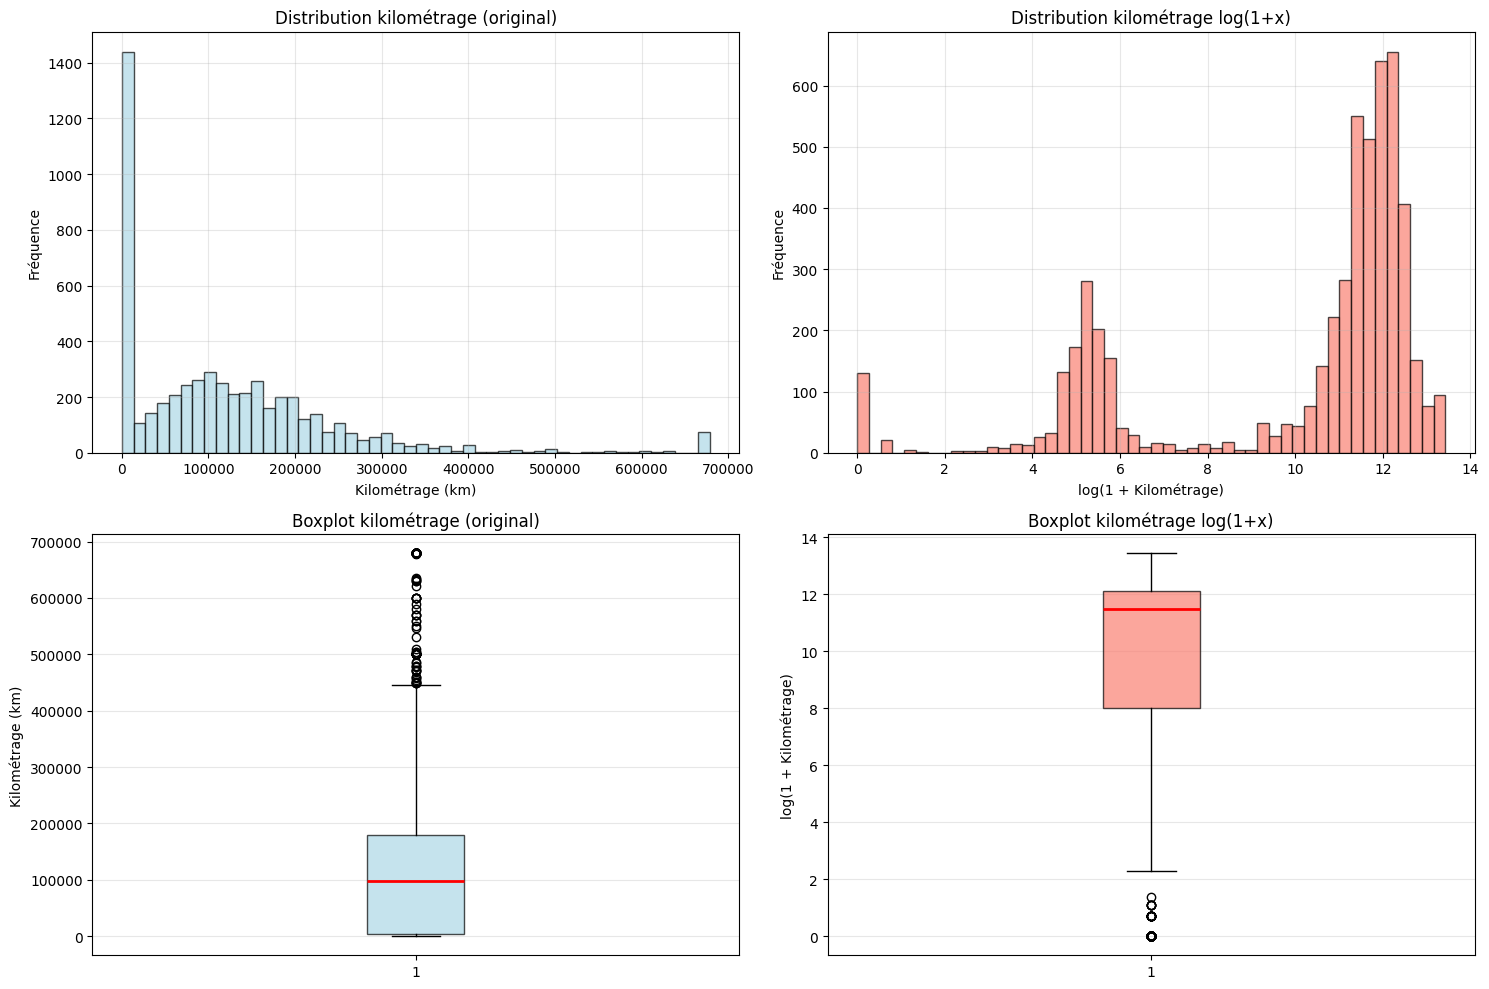


✓ Transformation terminée!
✓ La nouvelle colonne 'kilometrage_log' est prête pour la modélisation


In [30]:
# Application de la transformation log(1+x) au kilométrage
print("Application de la transformation log(1+x) au kilométrage...")
print("="*80)

# Statistiques AVANT transformation
print("AVANT transformation:")
print(f"{'-'*80}")
if df_copy['kilometrage'].notna().sum() > 0:
    km_before = df_copy['kilometrage'].dropna()
    print(f"  Min: {km_before.min():,.0f} km")
    print(f"  Max: {km_before.max():,.0f} km")
    print(f"  Moyenne: {km_before.mean():,.0f} km")
    print(f"  Médiane: {km_before.median():,.0f} km")
    print(f"  Skewness: {km_before.skew():.3f}")
    print(f"  Écart-type: {km_before.std():,.0f} km")

# Créer une nouvelle colonne avec la transformation log
df_copy['kilometrage_log'] = np.log1p(df_copy['kilometrage'])

# Statistiques APRÈS transformation
print(f"\n{'='*80}")
print("APRÈS transformation log(1+x):")
print(f"{'-'*80}")
if df_copy['kilometrage_log'].notna().sum() > 0:
    km_after = df_copy['kilometrage_log'].dropna()
    print(f"  Min: {km_after.min():.3f}")
    print(f"  Max: {km_after.max():.3f}")
    print(f"  Moyenne: {km_after.mean():.3f}")
    print(f"  Médiane: {km_after.median():.3f}")
    print(f"  Skewness: {km_after.skew():.3f}")
    print(f"  Écart-type: {km_after.std():.3f}")

print(f"\n{'='*80}")
print(f"✓ Nouvelle colonne 'kilometrage_log' créée!")
print(f"✓ Valeurs transformées: {df_copy['kilometrage_log'].notna().sum()}")
print(f"✓ Valeurs manquantes: {df_copy['kilometrage_log'].isna().sum()}")

# Visualisation comparée
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramme kilométrage original
axes[0, 0].hist(df_copy['kilometrage'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 0].set_title('Distribution kilométrage (original)')
axes[0, 0].set_xlabel('Kilométrage (km)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogramme kilométrage transformé
axes[0, 1].hist(df_copy['kilometrage_log'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='salmon')
axes[0, 1].set_title('Distribution kilométrage log(1+x)')
axes[0, 1].set_xlabel('log(1 + Kilométrage)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot kilométrage original
axes[1, 0].boxplot(df_copy['kilometrage'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Boxplot kilométrage (original)')
axes[1, 0].set_ylabel('Kilométrage (km)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Boxplot kilométrage transformé
axes[1, 1].boxplot(df_copy['kilometrage_log'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='salmon', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_title('Boxplot kilométrage log(1+x)')
axes[1, 1].set_ylabel('log(1 + Kilométrage)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✓ Transformation terminée!")
print("✓ La nouvelle colonne 'kilometrage_log' est prête pour la modélisation")

In [31]:
df_copy['kilometrage'].isnull().sum()

0

In [32]:
# Vérification des valeurs manquantes
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
type_de_carrosserie                 518     9.669591
etat_du_vehicule                    220     4.106776
puissance_fiscale                   199     3.714766
modele                              196     3.658764
cylindree                           194     3.621430
annee                               179     3.341422
carburant                            64     1.194699
couleur_du_vehicule                  42     0.784021
boite                                14     0.261340
marque                                9     0.168004


In [33]:
# Remplacement des valeurs manquantes catégoriques par 'inconnu'
print("Traitement des valeurs manquantes catégoriques...")
print("="*80)

# Identifier les colonnes catégoriques dans df_copy
categorical_cols_copy = df_copy.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols_copy:
    missing_count = df_copy[col].isnull().sum()
    if missing_count > 0:
        df_copy[col].fillna('inconnu', inplace=True)
        print(f"✓ {col}: {missing_count} valeurs manquantes remplacées par 'inconnu'")
    else:
        print(f"✓ {col}: Aucune valeur manquante")

print("\n" + "="*80)
print("Vérification après traitement:")
print(f"Valeurs manquantes restantes dans les colonnes catégoriques: {df_copy[categorical_cols_copy].isnull().sum().sum()}")


Traitement des valeurs manquantes catégoriques...
✓ couleur_du_vehicule: 42 valeurs manquantes remplacées par 'inconnu'
✓ etat_du_vehicule: 220 valeurs manquantes remplacées par 'inconnu'
✓ boite: 14 valeurs manquantes remplacées par 'inconnu'
✓ cylindree: 194 valeurs manquantes remplacées par 'inconnu'
✓ marque: 9 valeurs manquantes remplacées par 'inconnu'
✓ modele: 196 valeurs manquantes remplacées par 'inconnu'
✓ type_de_carrosserie: 518 valeurs manquantes remplacées par 'inconnu'
✓ carburant: 64 valeurs manquantes remplacées par 'inconnu'

Vérification après traitement:
Valeurs manquantes restantes dans les colonnes catégoriques: 0


In [34]:
# Vérification des valeurs manquantes
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                   Valeurs_Manquantes  Pourcentage
puissance_fiscale                 199     3.714766
annee                             179     3.341422


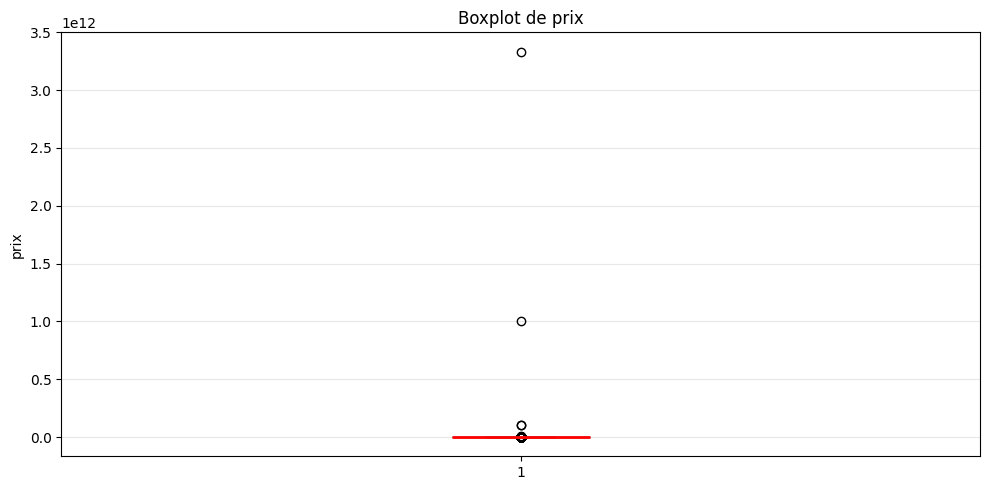

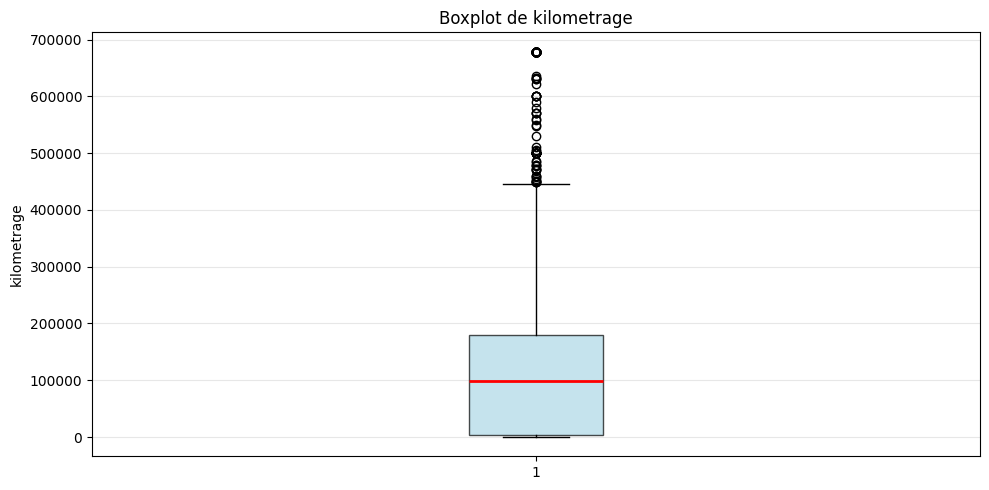

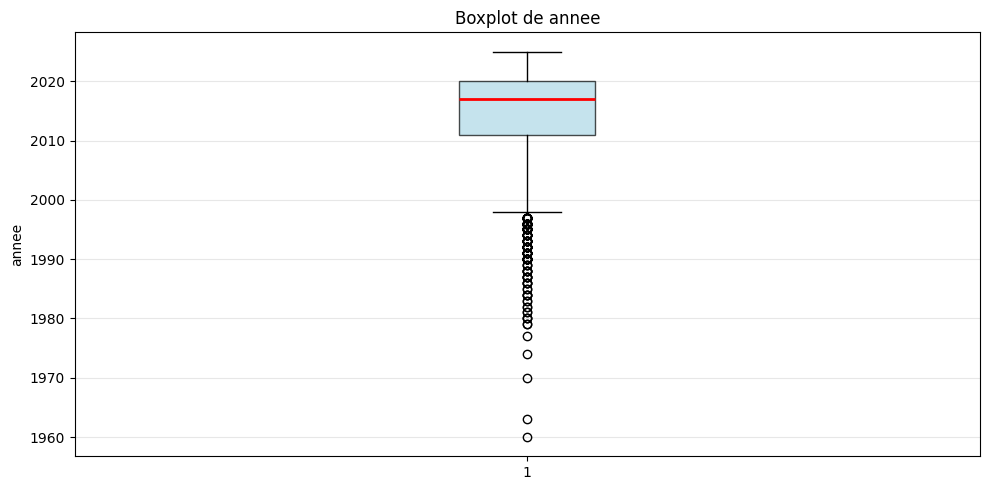

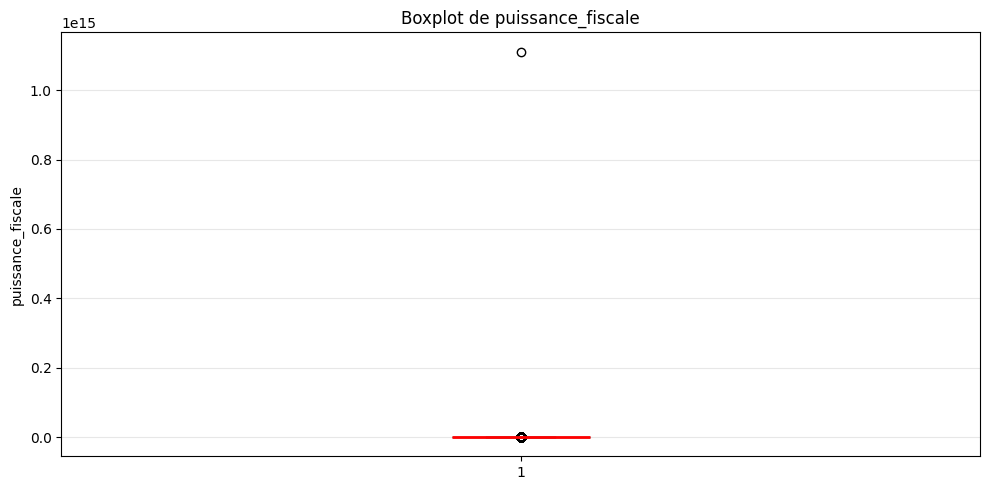

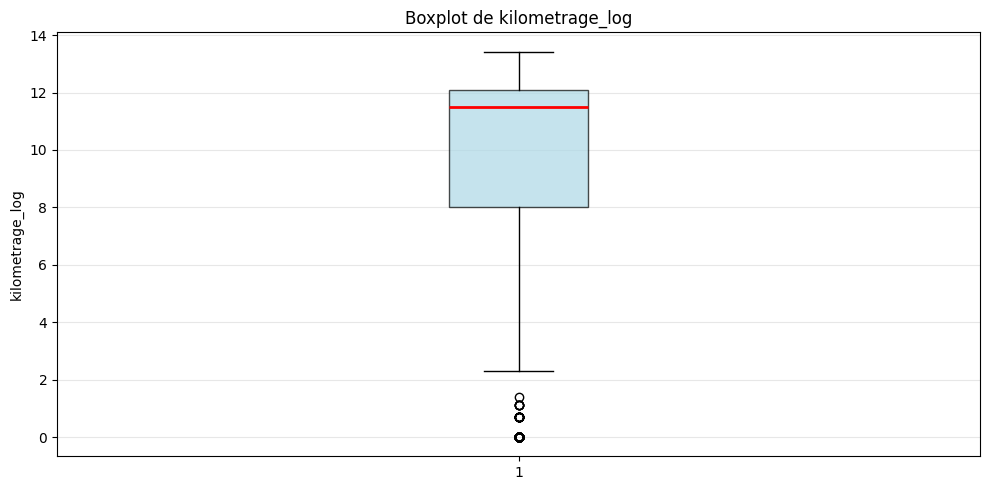

In [35]:
# Boxplots des variables numériques
numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_copy[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

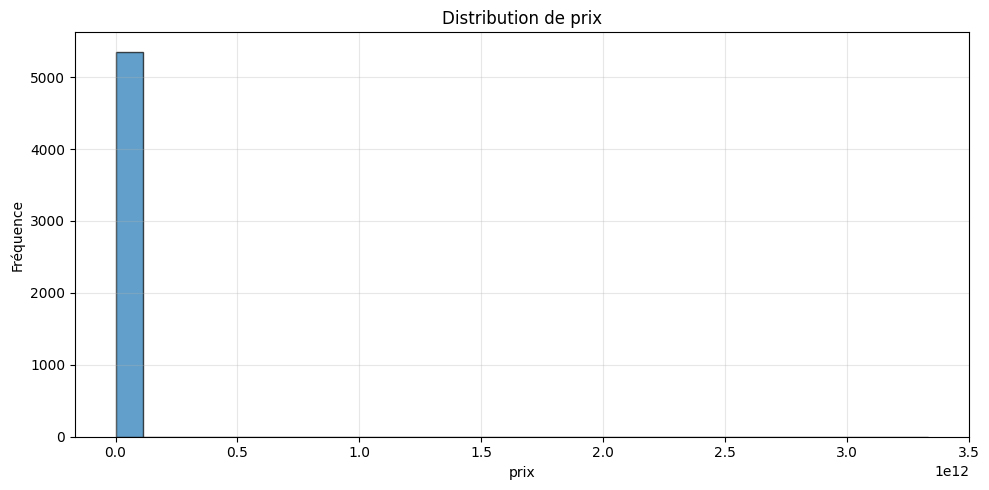

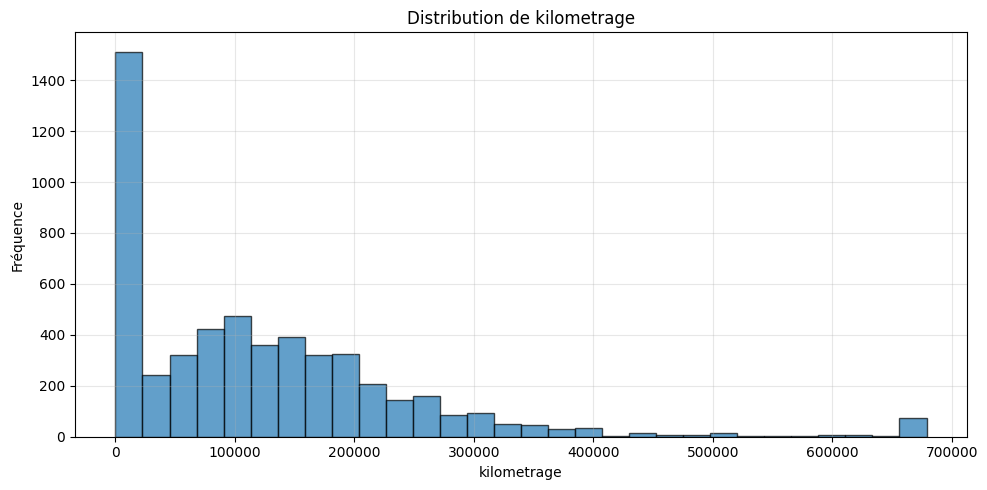

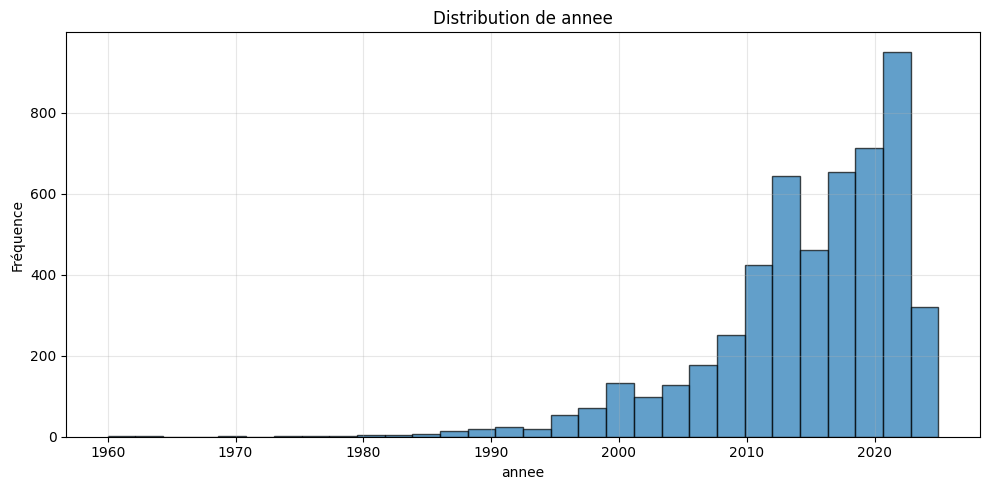

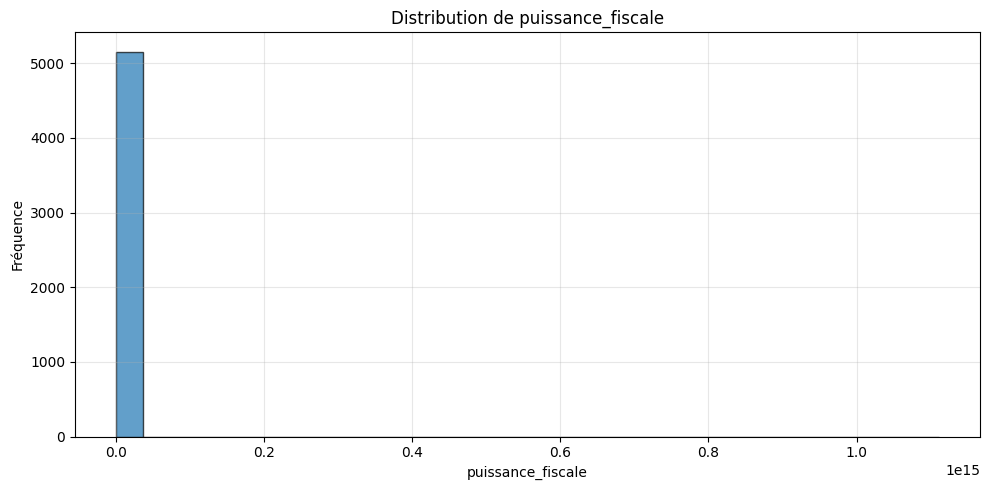

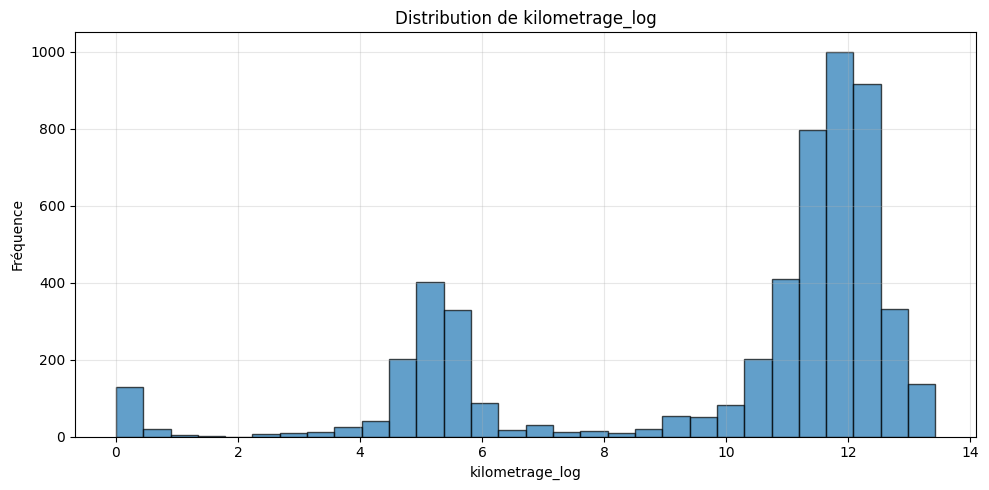


Statistiques des variables numériques:


In [36]:
# Distribution des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df_copy[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print("Statistiques des variables numériques:")
# print(df[numerical_cols].describe().T)

Colonnes numériques dans df_copy: ['prix', 'kilometrage', 'annee', 'puissance_fiscale', 'kilometrage_log']



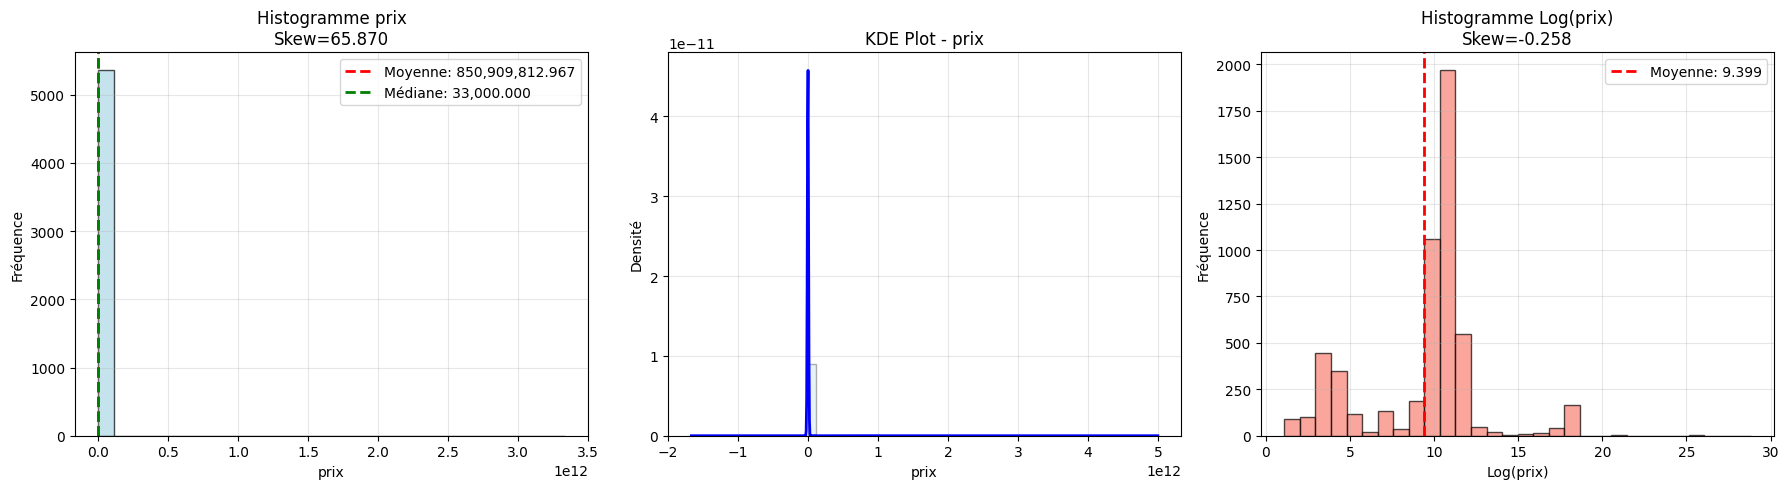


Statistiques pour prix:
  Moyenne: 850,909,812.967
  Médiane: 33,000.000
  Skewness: 65.870
  Min: 2.000
  Max: 3,333,333,500,000.000
  Std: 47,584,208,829.000


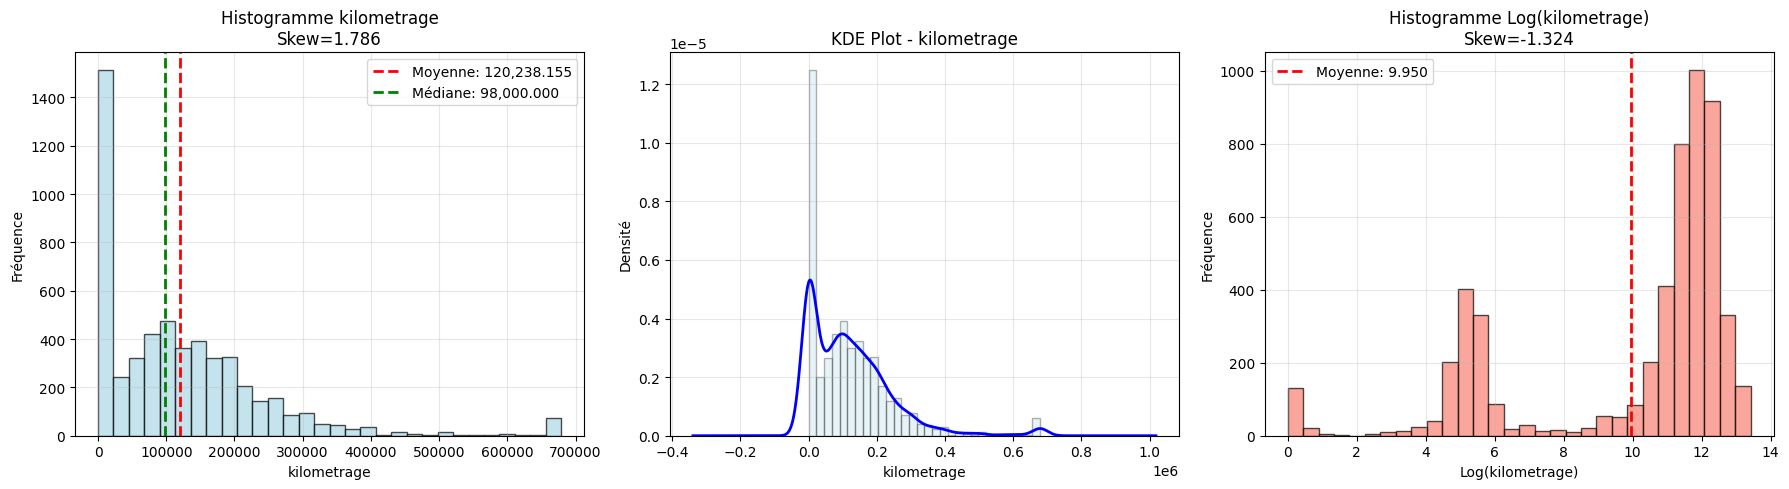


Statistiques pour kilometrage:
  Moyenne: 120,238.155
  Médiane: 98,000.000
  Skewness: 1.786
  Min: 0.000
  Max: 678,900.850
  Std: 124,384.250


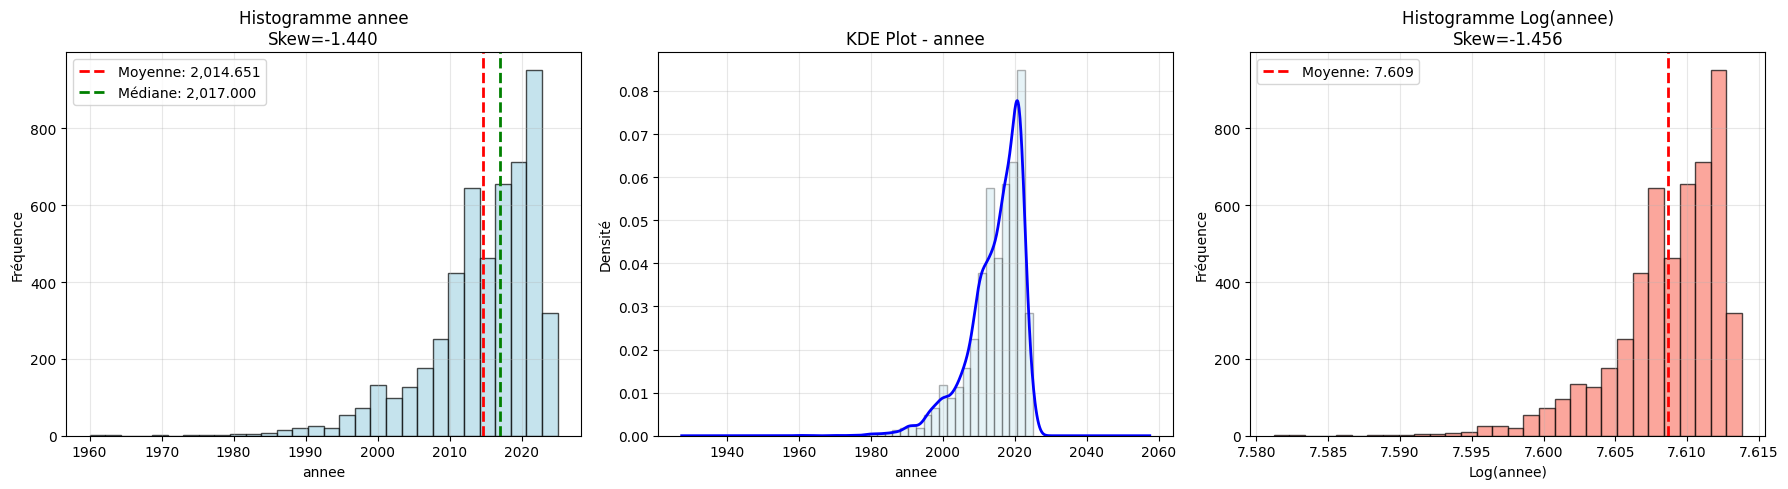


Statistiques pour annee:
  Moyenne: 2,014.651
  Médiane: 2,017.000
  Skewness: -1.440
  Min: 1,960.000
  Max: 2,025.000
  Std: 7.536


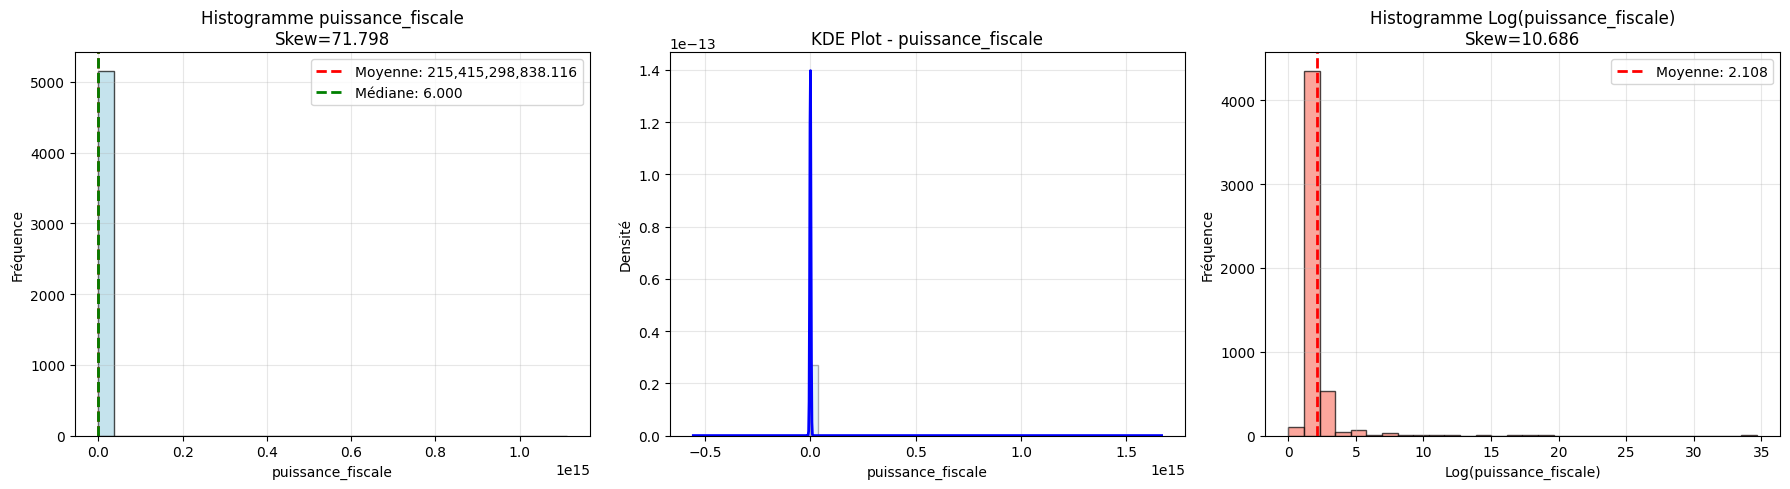


Statistiques pour puissance_fiscale:
  Moyenne: 215,415,298,838.116
  Médiane: 6.000
  Skewness: 71.798
  Min: 0.000
  Max: 1,111,111,111,111,111.000
  Std: 15,470,944,265,944.467


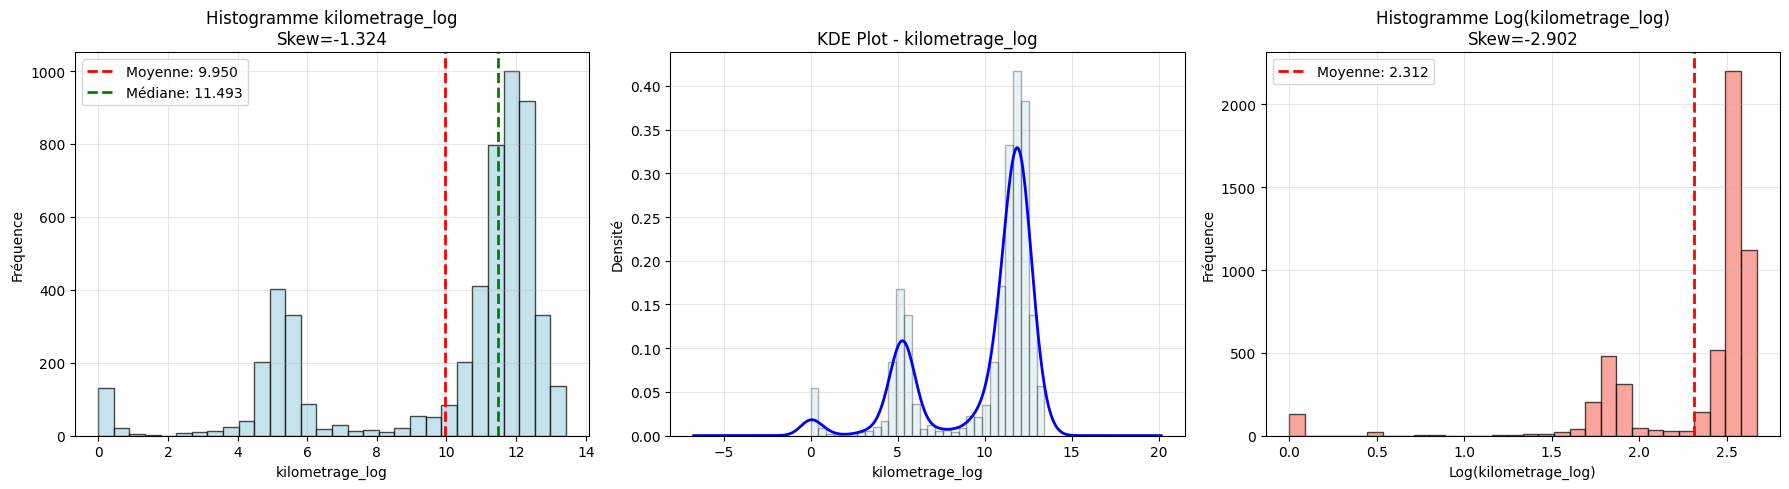


Statistiques pour kilometrage_log:
  Moyenne: 9.950
  Médiane: 11.493
  Skewness: -1.324
  Min: 0.000
  Max: 13.428
  Std: 3.254


In [37]:
# Distribution détaillée des variables numériques (Histogramme, KDE, Log-transform)
from scipy.stats import skew

# Utiliser df_copy et s'assurer que les colonnes sont bien numériques
numerical_cols_copy = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Colonnes numériques dans df_copy: {numerical_cols_copy}\n")

for col in numerical_cols_copy:
    # Convertir en numérique si nécessaire
    data = pd.to_numeric(df_copy[col], errors='coerce').dropna()
    
    if len(data) == 0:
        print(f"⚠️ Aucune donnée valide pour {col}, passage à la colonne suivante")
        continue
    
    # Créer une figure avec 3 sous-graphiques
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Calcul des statistiques
    mean_val = data.mean()
    median_val = data.median()
    skew_val = skew(data)
    
    # 1. Histogramme avec moyenne et médiane
    axes[0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:,.3f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:,.3f}')
    axes[0].set_title(f'Histogramme {col}\nSkew={skew_val:.3f}')
    axes[0].set_xlabel(f'{col}')
    axes[0].set_ylabel('Fréquence')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. KDE Plot (Kernel Density Estimation)
    axes[1].hist(data, bins=30, density=True, alpha=0.3, edgecolor='black', color='lightblue')
    data.plot(kind='kde', ax=axes[1], linewidth=2, color='blue')
    axes[1].set_title(f'KDE Plot - {col}')
    axes[1].set_xlabel(f'{col}')
    axes[1].set_ylabel('Densité')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Histogramme avec transformation logarithmique (si toutes les valeurs sont positives)
    if (data >= 0).all():
        log_data = np.log1p(data)
        log_mean = log_data.mean()
        log_skew = skew(log_data)
        
        axes[2].hist(log_data, bins=30, edgecolor='black', alpha=0.7, color='salmon')
        axes[2].axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {log_mean:.3f}')
        axes[2].set_title(f'Histogramme Log({col})\nSkew={log_skew:.3f}')
        axes[2].set_xlabel(f'Log({col})')
        axes[2].set_ylabel('Fréquence')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
    else:
        axes[2].text(0.5, 0.5, 'Transformation log\nnon applicable\n(valeurs ≤ 0)', 
                     ha='center', va='center', fontsize=12)
        axes[2].set_title(f'Histogramme Log({col})')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques
    print(f"\n{'='*80}")
    print(f"Statistiques pour {col}:")
    print(f"  Moyenne: {mean_val:,.3f}")
    print(f"  Médiane: {median_val:,.3f}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Min: {data.min():,.3f}")
    print(f"  Max: {data.max():,.3f}")
    print(f"  Std: {data.std():,.3f}")

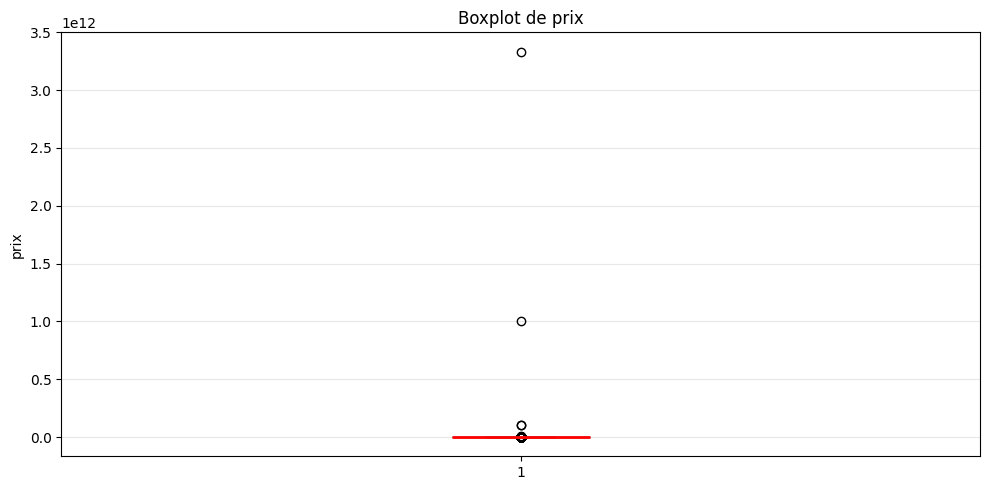

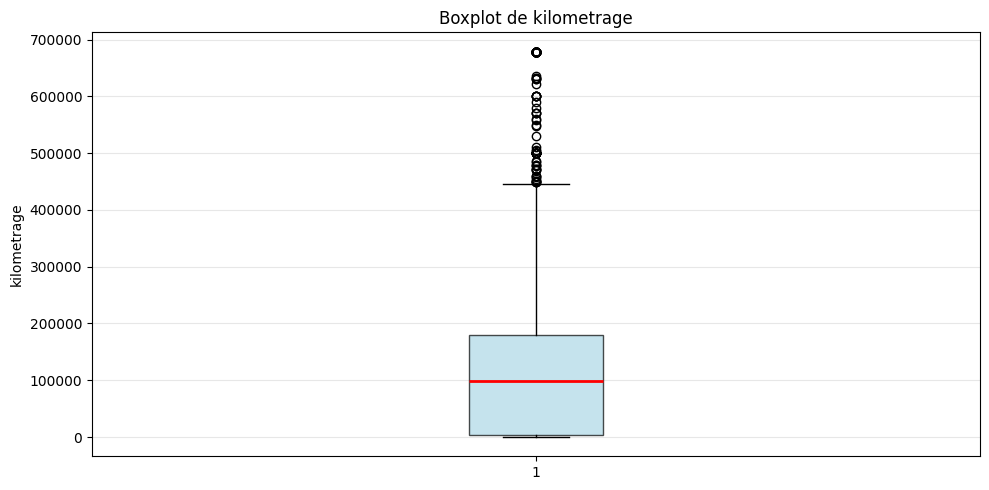

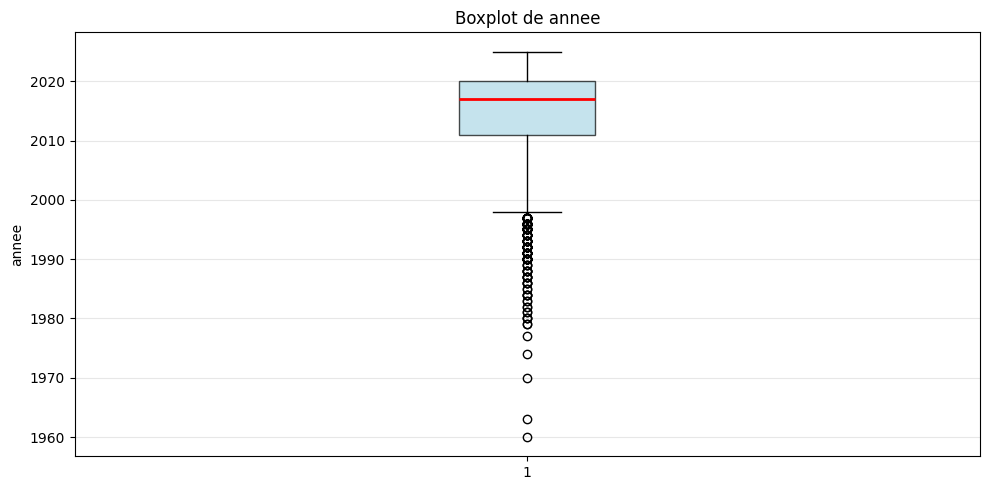

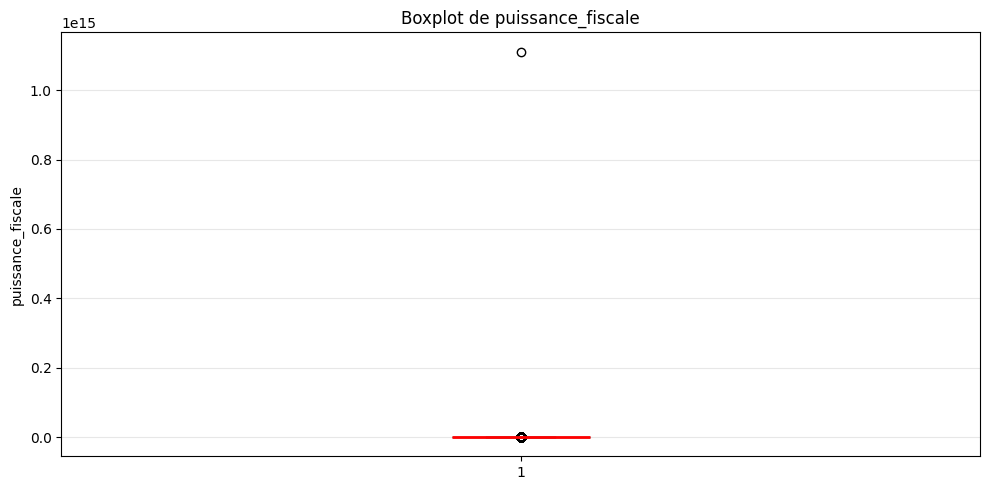

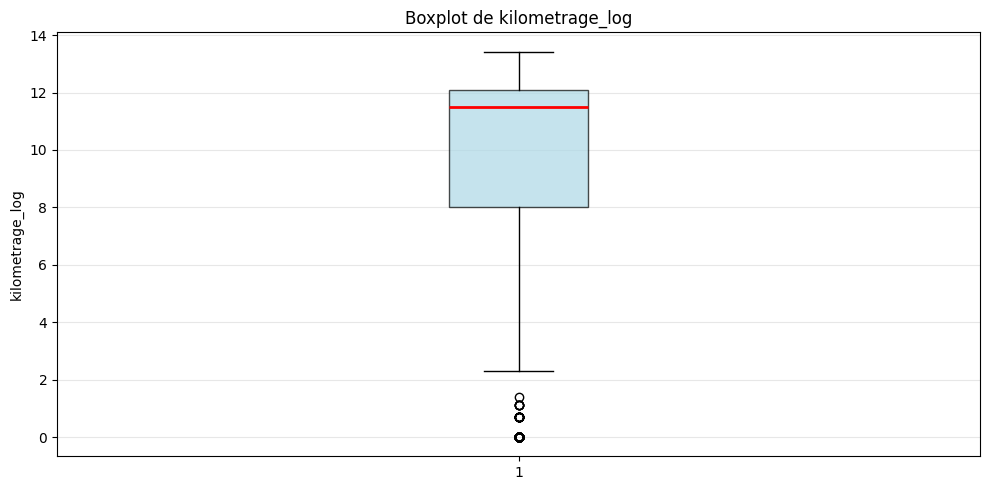

In [38]:
# Boxplots des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_copy[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

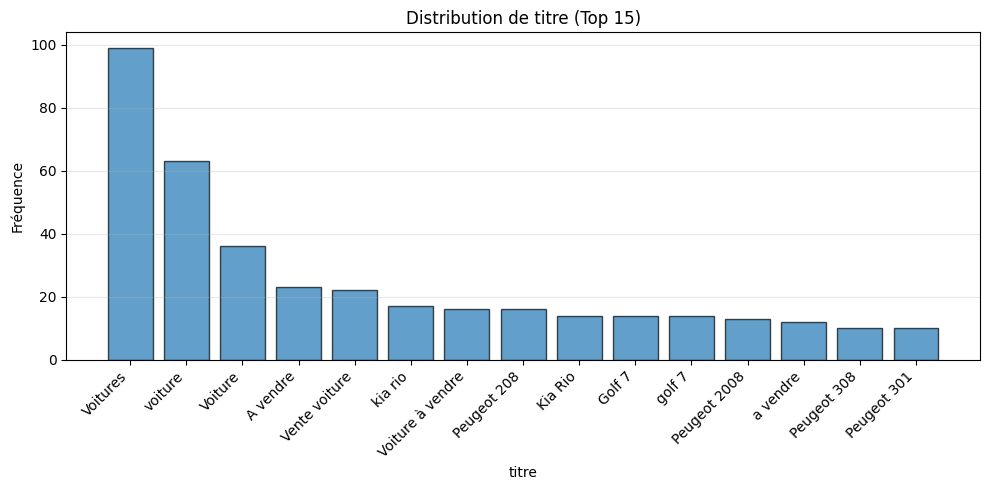

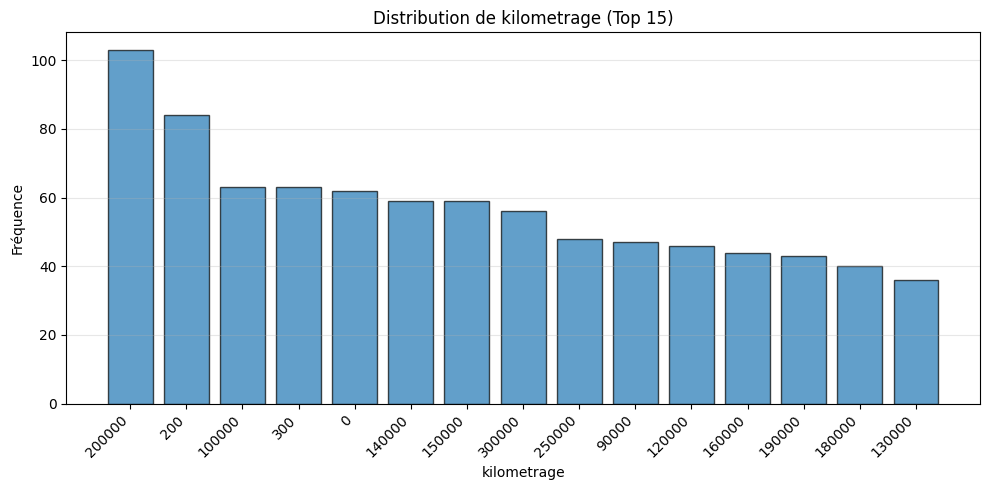

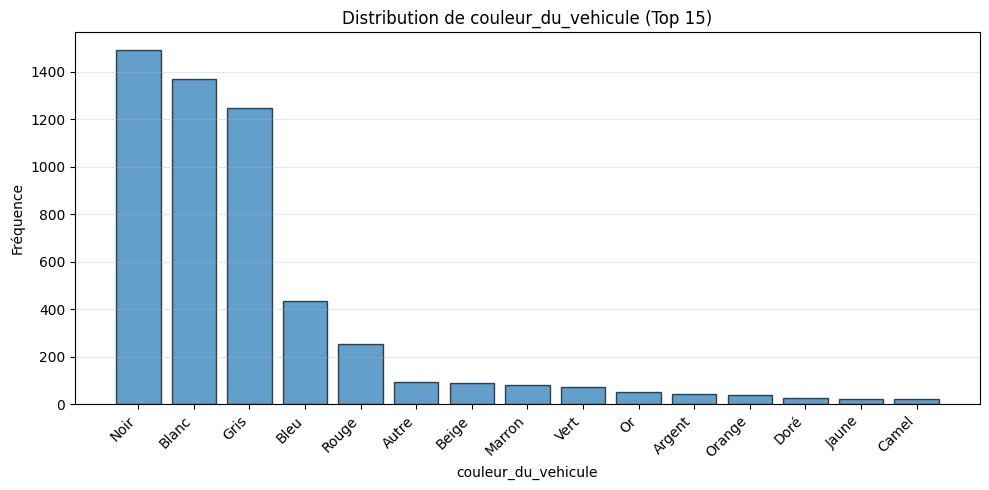

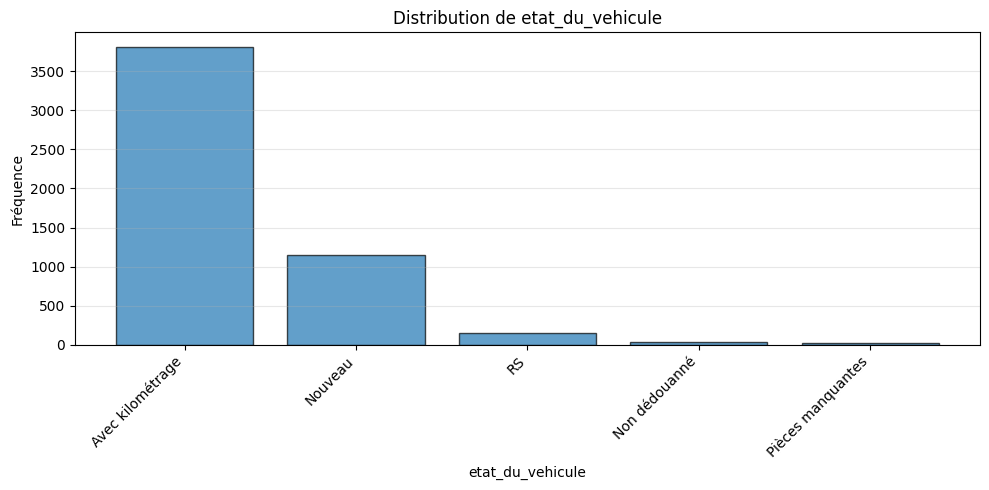

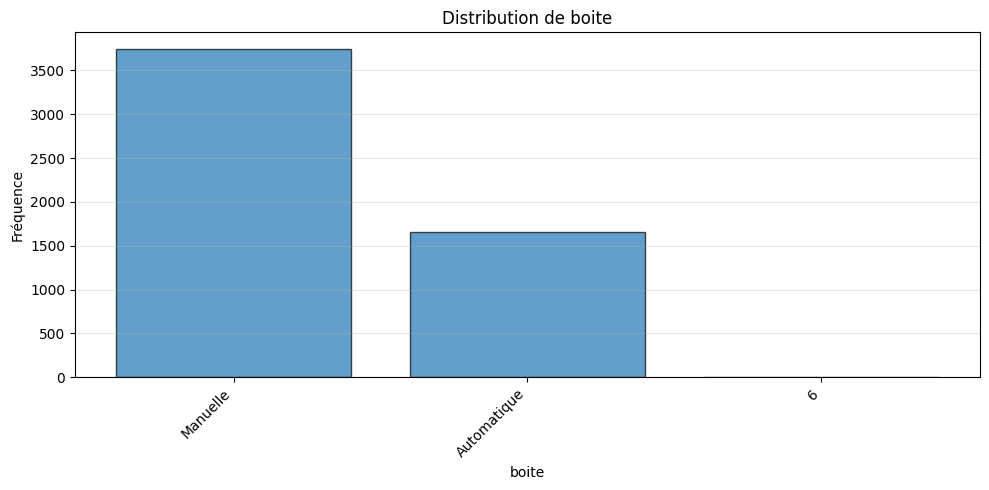

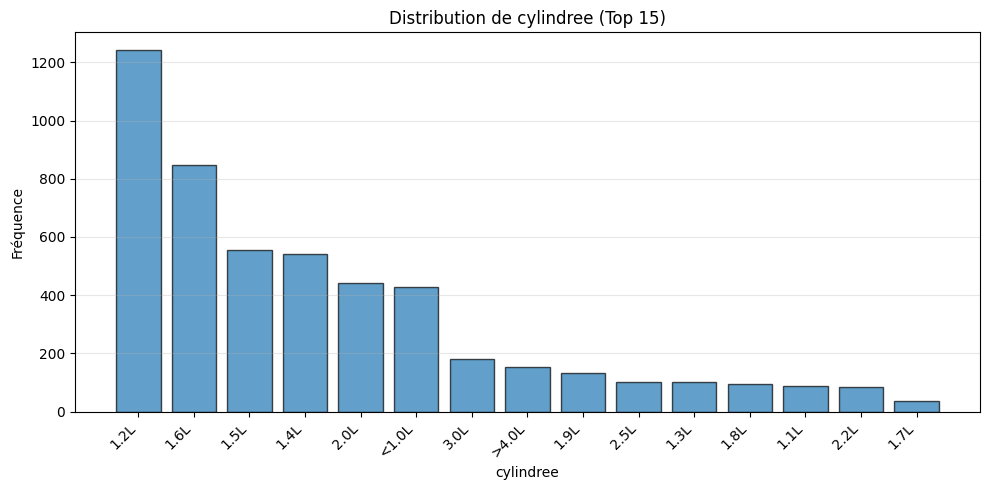

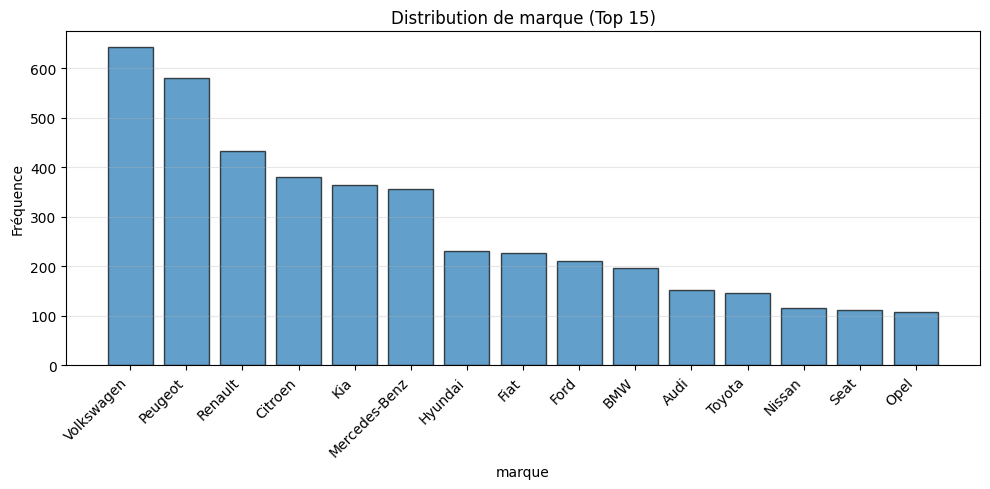

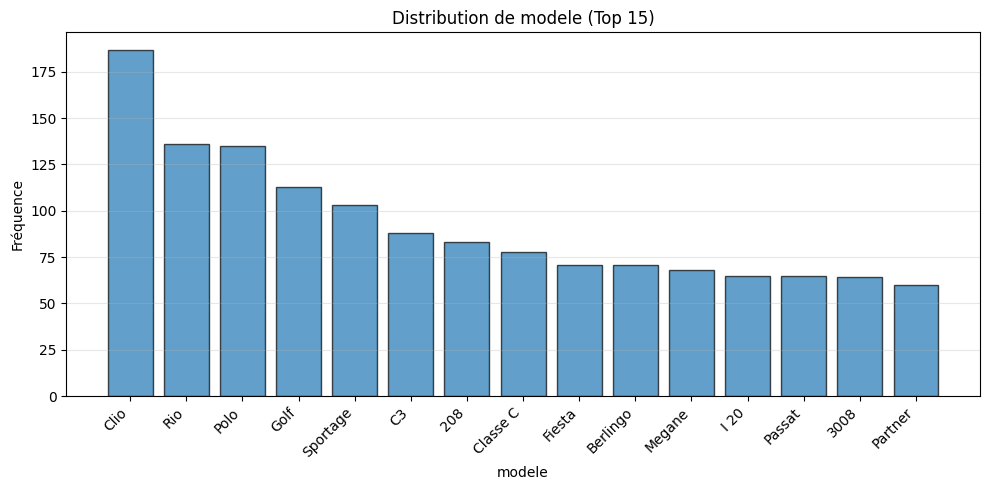

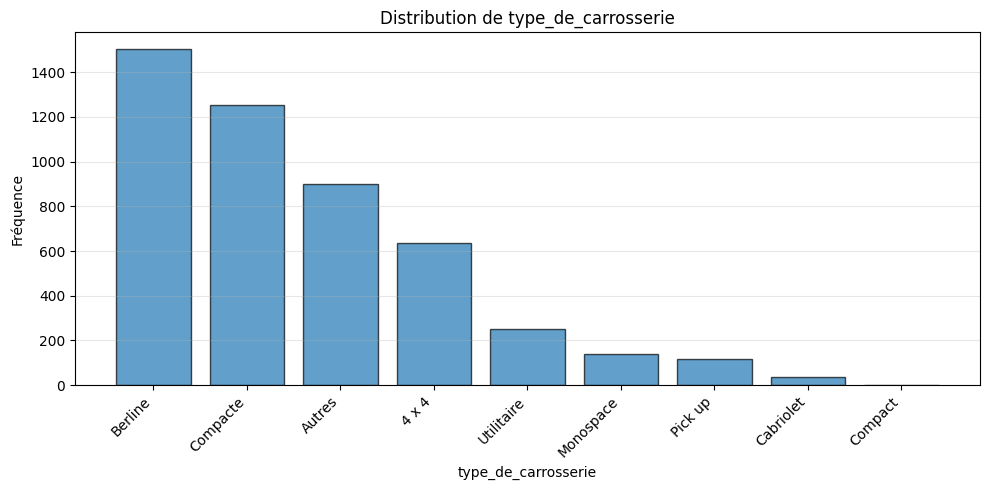

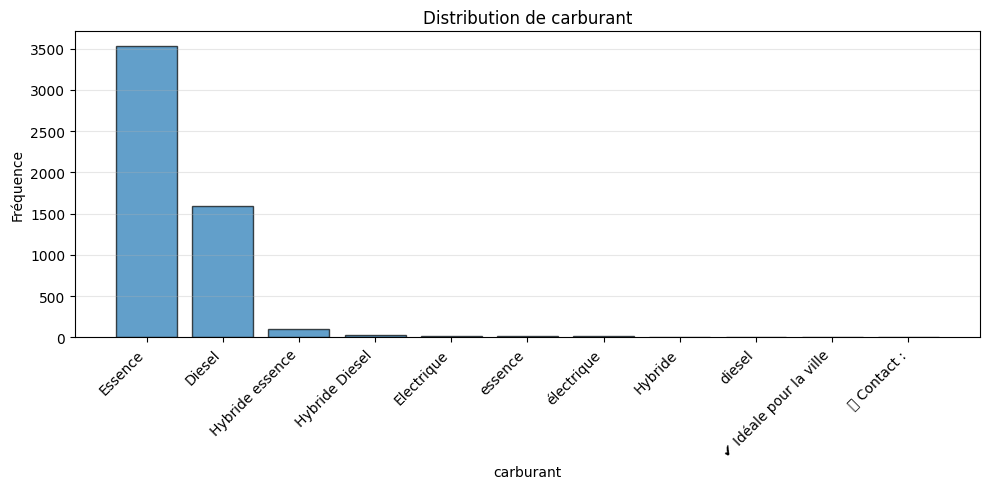

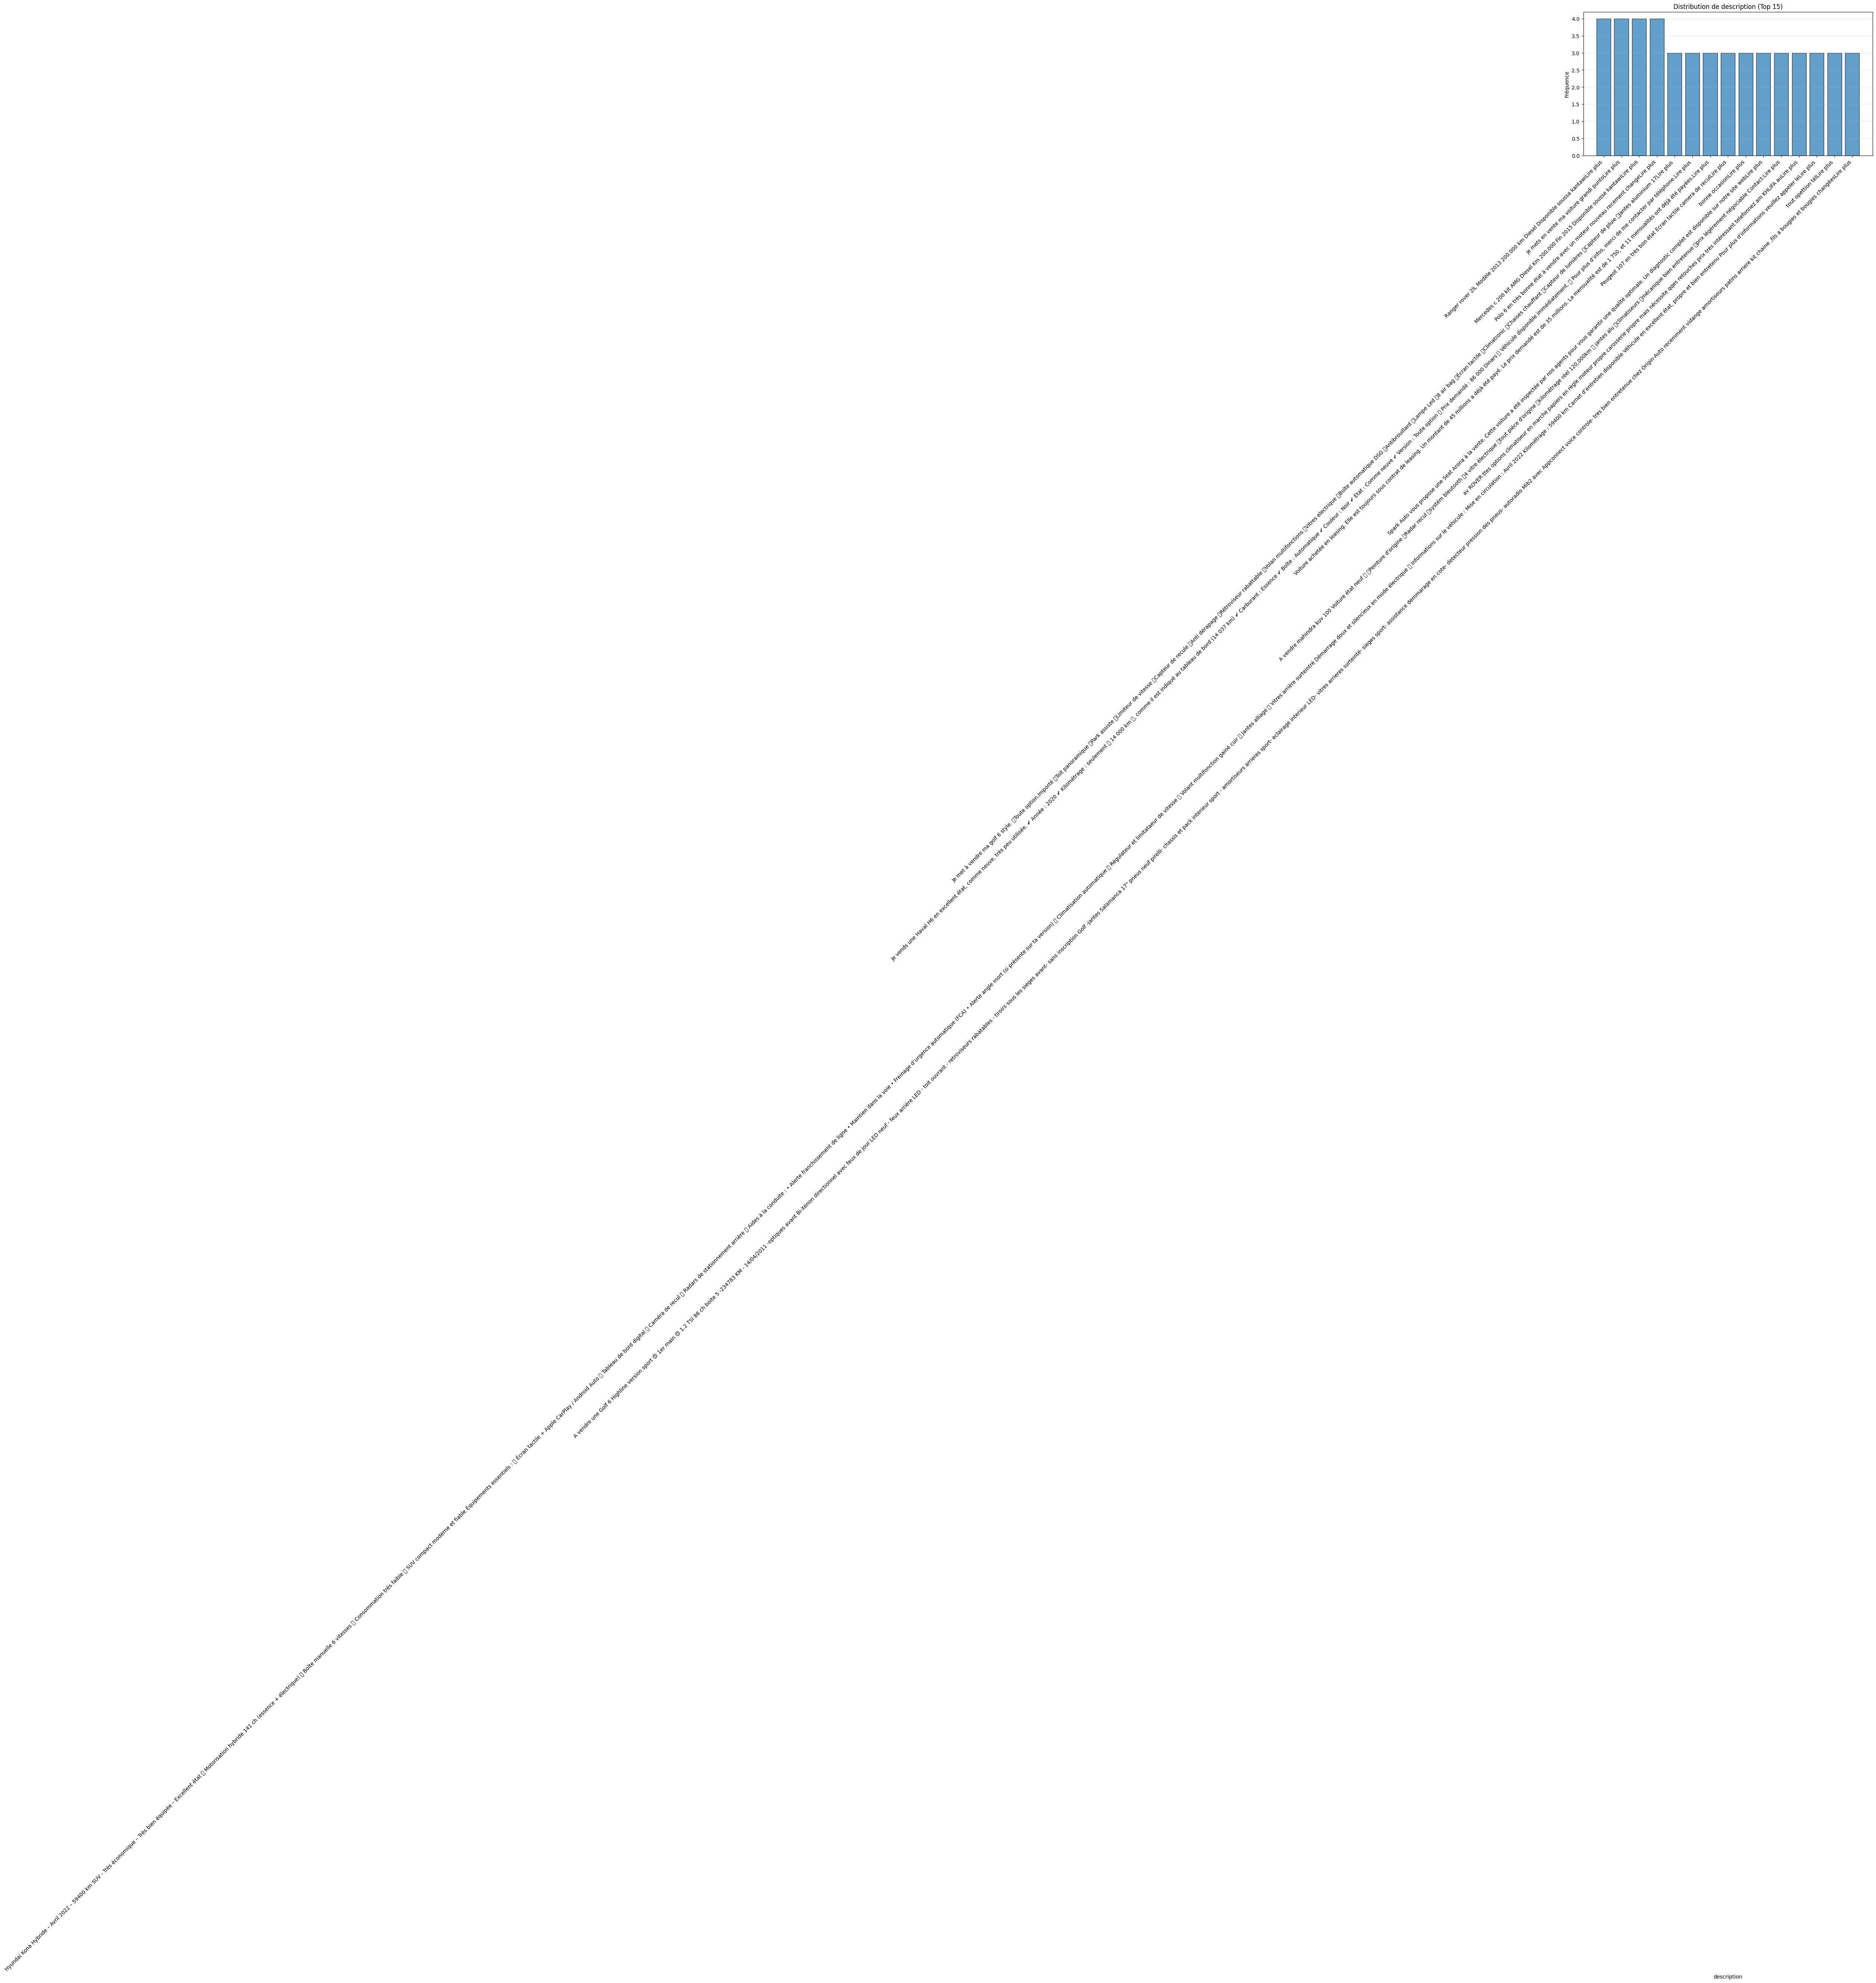

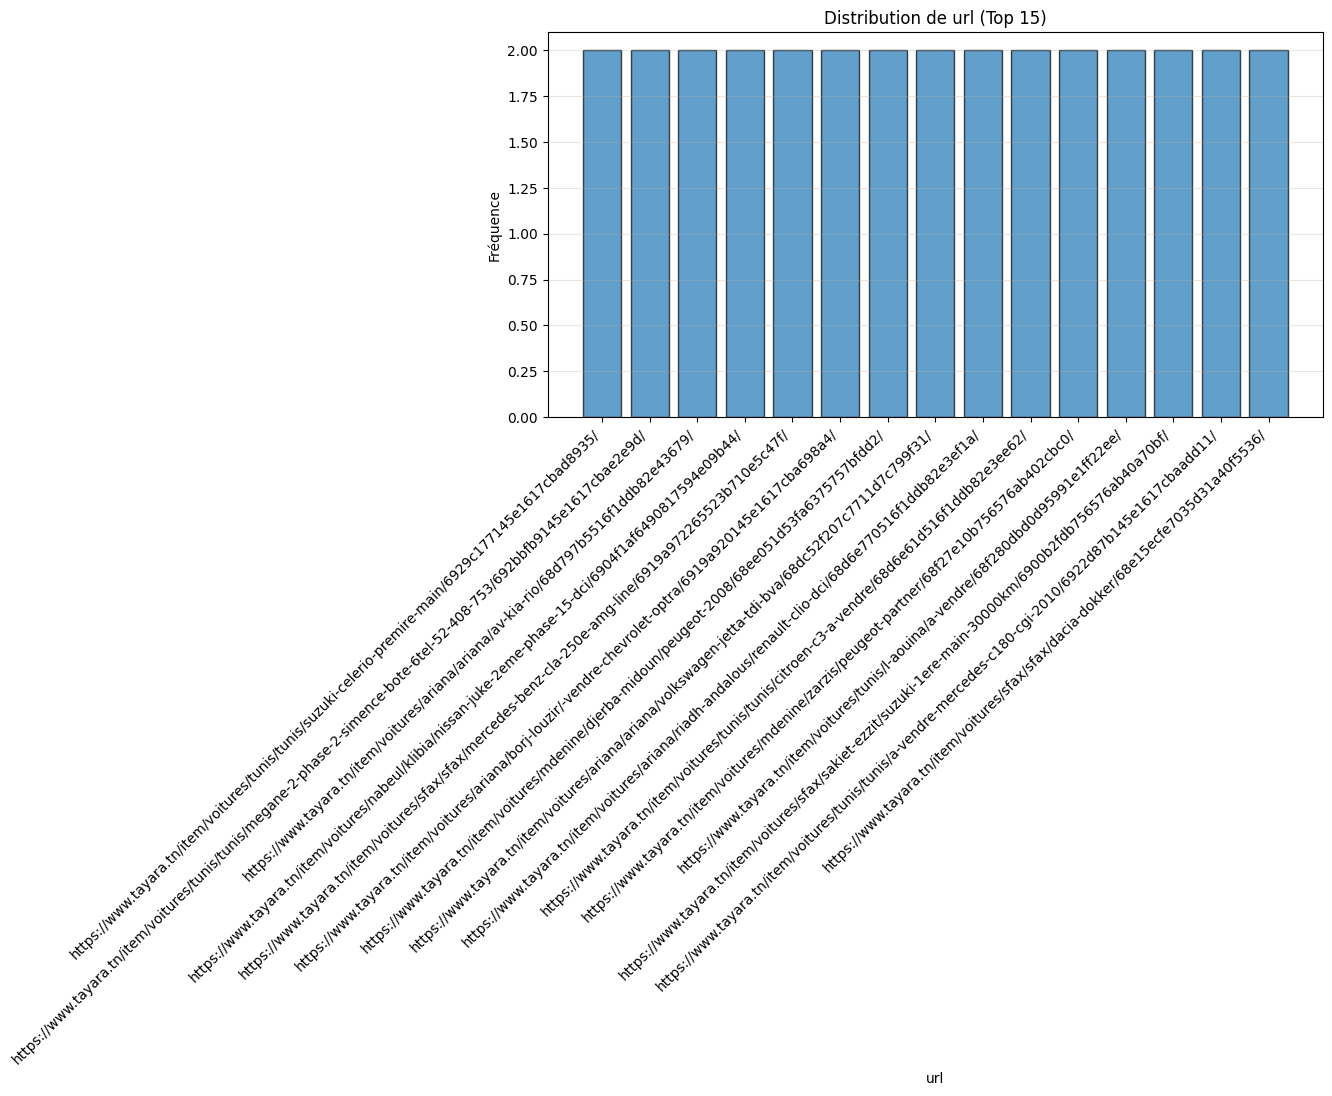

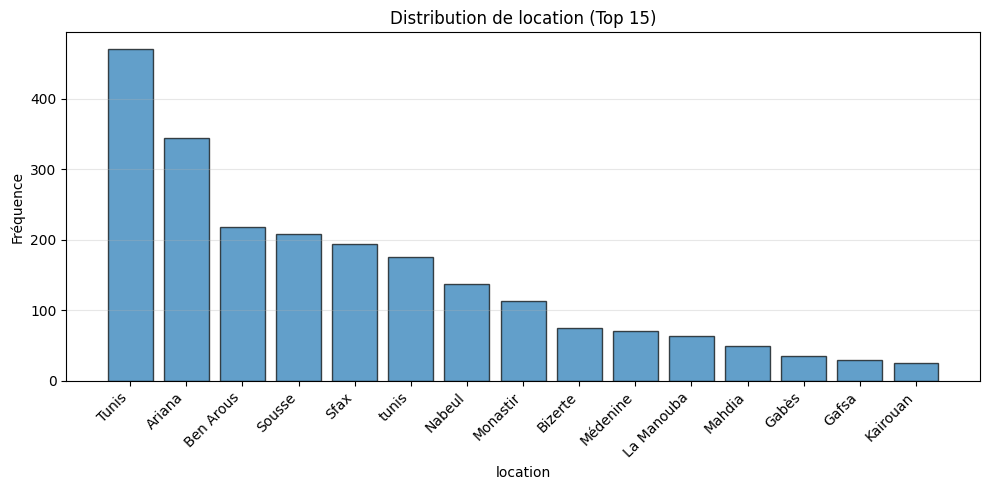

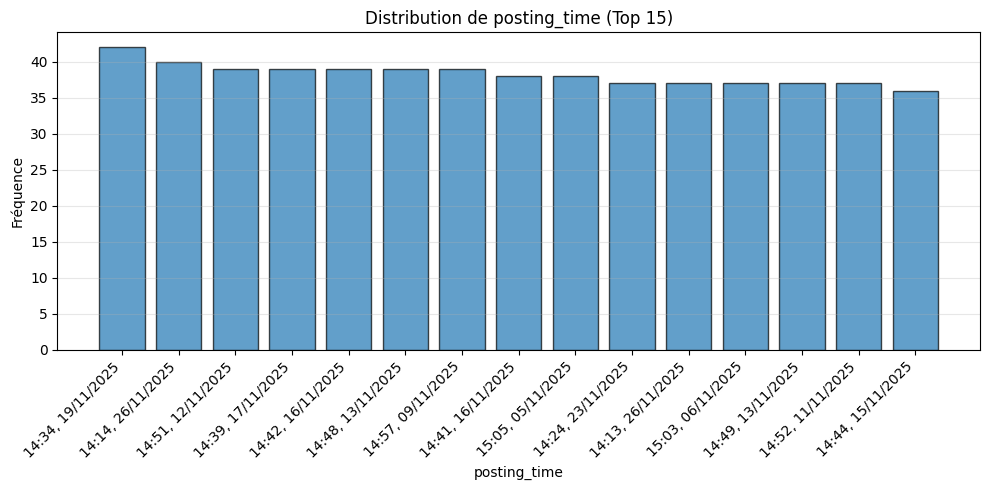


Nombre de valeurs uniques par variable catégorique:
  titre: 4341 valeurs uniques
  kilometrage: 1096 valeurs uniques
  couleur_du_vehicule: 19 valeurs uniques
  etat_du_vehicule: 5 valeurs uniques
  boite: 3 valeurs uniques
  cylindree: 43 valeurs uniques
  marque: 86 valeurs uniques
  modele: 536 valeurs uniques
  type_de_carrosserie: 9 valeurs uniques
  carburant: 11 valeurs uniques
  description: 4286 valeurs uniques
  url: 5521 valeurs uniques
  location: 36 valeurs uniques
  posting_time: 124 valeurs uniques


In [39]:
# Distribution des variables catégoriques
for col in categorical_cols:
    value_counts = df[col].value_counts()
    
    # Limiter à 15 catégories les plus fréquentes si nécessaire
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        title = f'Distribution de {col} (Top 15)'
    else:
        title = f'Distribution de {col}'
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(value_counts)), value_counts.values, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Afficher le nombre de valeurs uniques pour chaque variable catégorique
print(f"\n{'='*80}")
print("Nombre de valeurs uniques par variable catégorique:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} valeurs uniques")

In [40]:
df.duplicated().sum()
print(df[df.duplicated()])

                                                titre        prix kilometrage  \
38                      Suzuki Celerio, première main     31000.0       53000   
203   megane 2 phase 2 simence boîte 6 tel 52 408 753     21800.0      260000   
256                            🚘 FORD KA 1 ère ✋ main     26500.0      221000   
615                        ford fiesta boite manuelle     15800.0      252000   
1192                                   caddy 5 places     31000.0         000   
1219                               Peugeot 208 Diesel        39.0         145   
1282                         Volkswagen Jetta TDI BVA  55111110.0      220000   
1445                                 megane 2 blanche     18500.0      260000   
1467                A Vendre Mercedes C180 CGI (2010)     45000.0      150000   
1666                                          voiture     32000.0      140000   
2244                  Mercedes Benz CLA 250e AMG LINE  96502504.0       69000   
2245                        

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.duplicated().sum()

0

In [43]:
# Remplacement des valeurs manquantes numériques par la médiane
print("Traitement des valeurs manquantes numériques...")
print("="*80)

for col in numerical_cols:
    missing_count = df_copy[col].isnull().sum()
    if missing_count > 0:
        median_val = df_copy[col].median()
        df_copy[col].fillna(median_val, inplace=True)
        print(f"✓ {col}: {missing_count} valeurs manquantes remplacées par la médiane ({median_val:,.3f})")
    else:
        print(f"✓ {col}: Aucune valeur manquante")

print("\n" + "="*80)
print("Vérification après traitement:")
print(f"Valeurs manquantes restantes dans les colonnes numériques: {df_copy[numerical_cols].isnull().sum().sum()}")

Traitement des valeurs manquantes numériques...
✓ prix: Aucune valeur manquante
✓ kilometrage: Aucune valeur manquante
✓ annee: 179 valeurs manquantes remplacées par la médiane (2,017.000)
✓ puissance_fiscale: 199 valeurs manquantes remplacées par la médiane (6.000)
✓ kilometrage_log: Aucune valeur manquante

Vérification après traitement:
Valeurs manquantes restantes dans les colonnes numériques: 0
